In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\churn-bigml-80.csv")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

# Data Understandinng

1. State => 51 Unique States Name

2. Account Length => Length Of The Account

3. Area Code => Code Number Of Area Having Some States

4. International Plan => Yes Indicate International Plan Is Present ANd No Indicates No Subbscription For Internatinal Plan

5. Voice Mail Plan => Yes Indicates Voice Mail Plan Is Prsent And No Indicates No Subscription For International Plan

6. Number Vmail Massages => Number Of Voice Mail Messages Ranging From 0 To 50

7. Total Day Minutes => Total Number Of Minutes Spent In Morning

8. Total Day Calls => Total Number Of Calls Made In Morning

9. Total Day Charge => Total Charge To The Customers In Morning

10. Total Eve Minutes => Total Number Of Minutes Spent In Evening

11. Total Eve Calls => Total Number Of Calls Made In Evening

12. Total Eve Charge => Total Charge To The Customers In Morning

13. Total Night Minutes => Total Number Of Minutes Spent In The Night

14. Total Night Calls => Total Number Of Calls Made In Night

15. Total Night Charge => Total Charge To The Customers In Night

16. Customer service calls => Number Of Customer Service Calls Made By Customer

17. Chum Customer Chum => True Means Chumed Customer, False Means Retained Customer

# DataSet Understanding

In [5]:
df.shape

(2666, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
df.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [8]:
print(df.Churn.value_counts())

False    2278
True      388
Name: Churn, dtype: int64


In [9]:
continuous_variables = []
discrete_categorical_variables = []
discrete_count_variables = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        if len(df[column].unique()) > 20:
            continuous_variables.append(column)
        else:
            if len(df[column].unique()) <= 10:
                discrete_count_variables.append(column)
            else:
                discrete_categorical_variables.append(column)
    elif df[column].dtype == 'object':
        discrete_categorical_variables.append(column)

print("Continuous Variables:",continuous_variables)
print("Discrete Categorical Variables:", discrete_categorical_variables)
print("Discrete Count Variables:", discrete_count_variables)

Continuous Variables: ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge']
Discrete Categorical Variables: ['State', 'International plan', 'Voice mail plan']
Discrete Count Variables: ['Area code', 'Customer service calls']


In [10]:
continuous_variables = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        if len(df[column].unique()) > 20:
            continuous_variables.append(column)
continuous_variable_stats = df[continuous_variables].describe()

print("Continuous Variables:")
print(continuous_variable_stats)

Continuous Variables:
       Account length  Number vmail messages  Total day minutes  \
count     2666.000000            2666.000000         2666.00000   
mean       100.620405               8.021755          179.48162   
std         39.563974              13.612277           54.21035   
min          1.000000               0.000000            0.00000   
25%         73.000000               0.000000          143.40000   
50%        100.000000               0.000000          179.95000   
75%        127.000000              19.000000          215.90000   
max        243.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.0

# Exploratory Data Analysis(EDA)


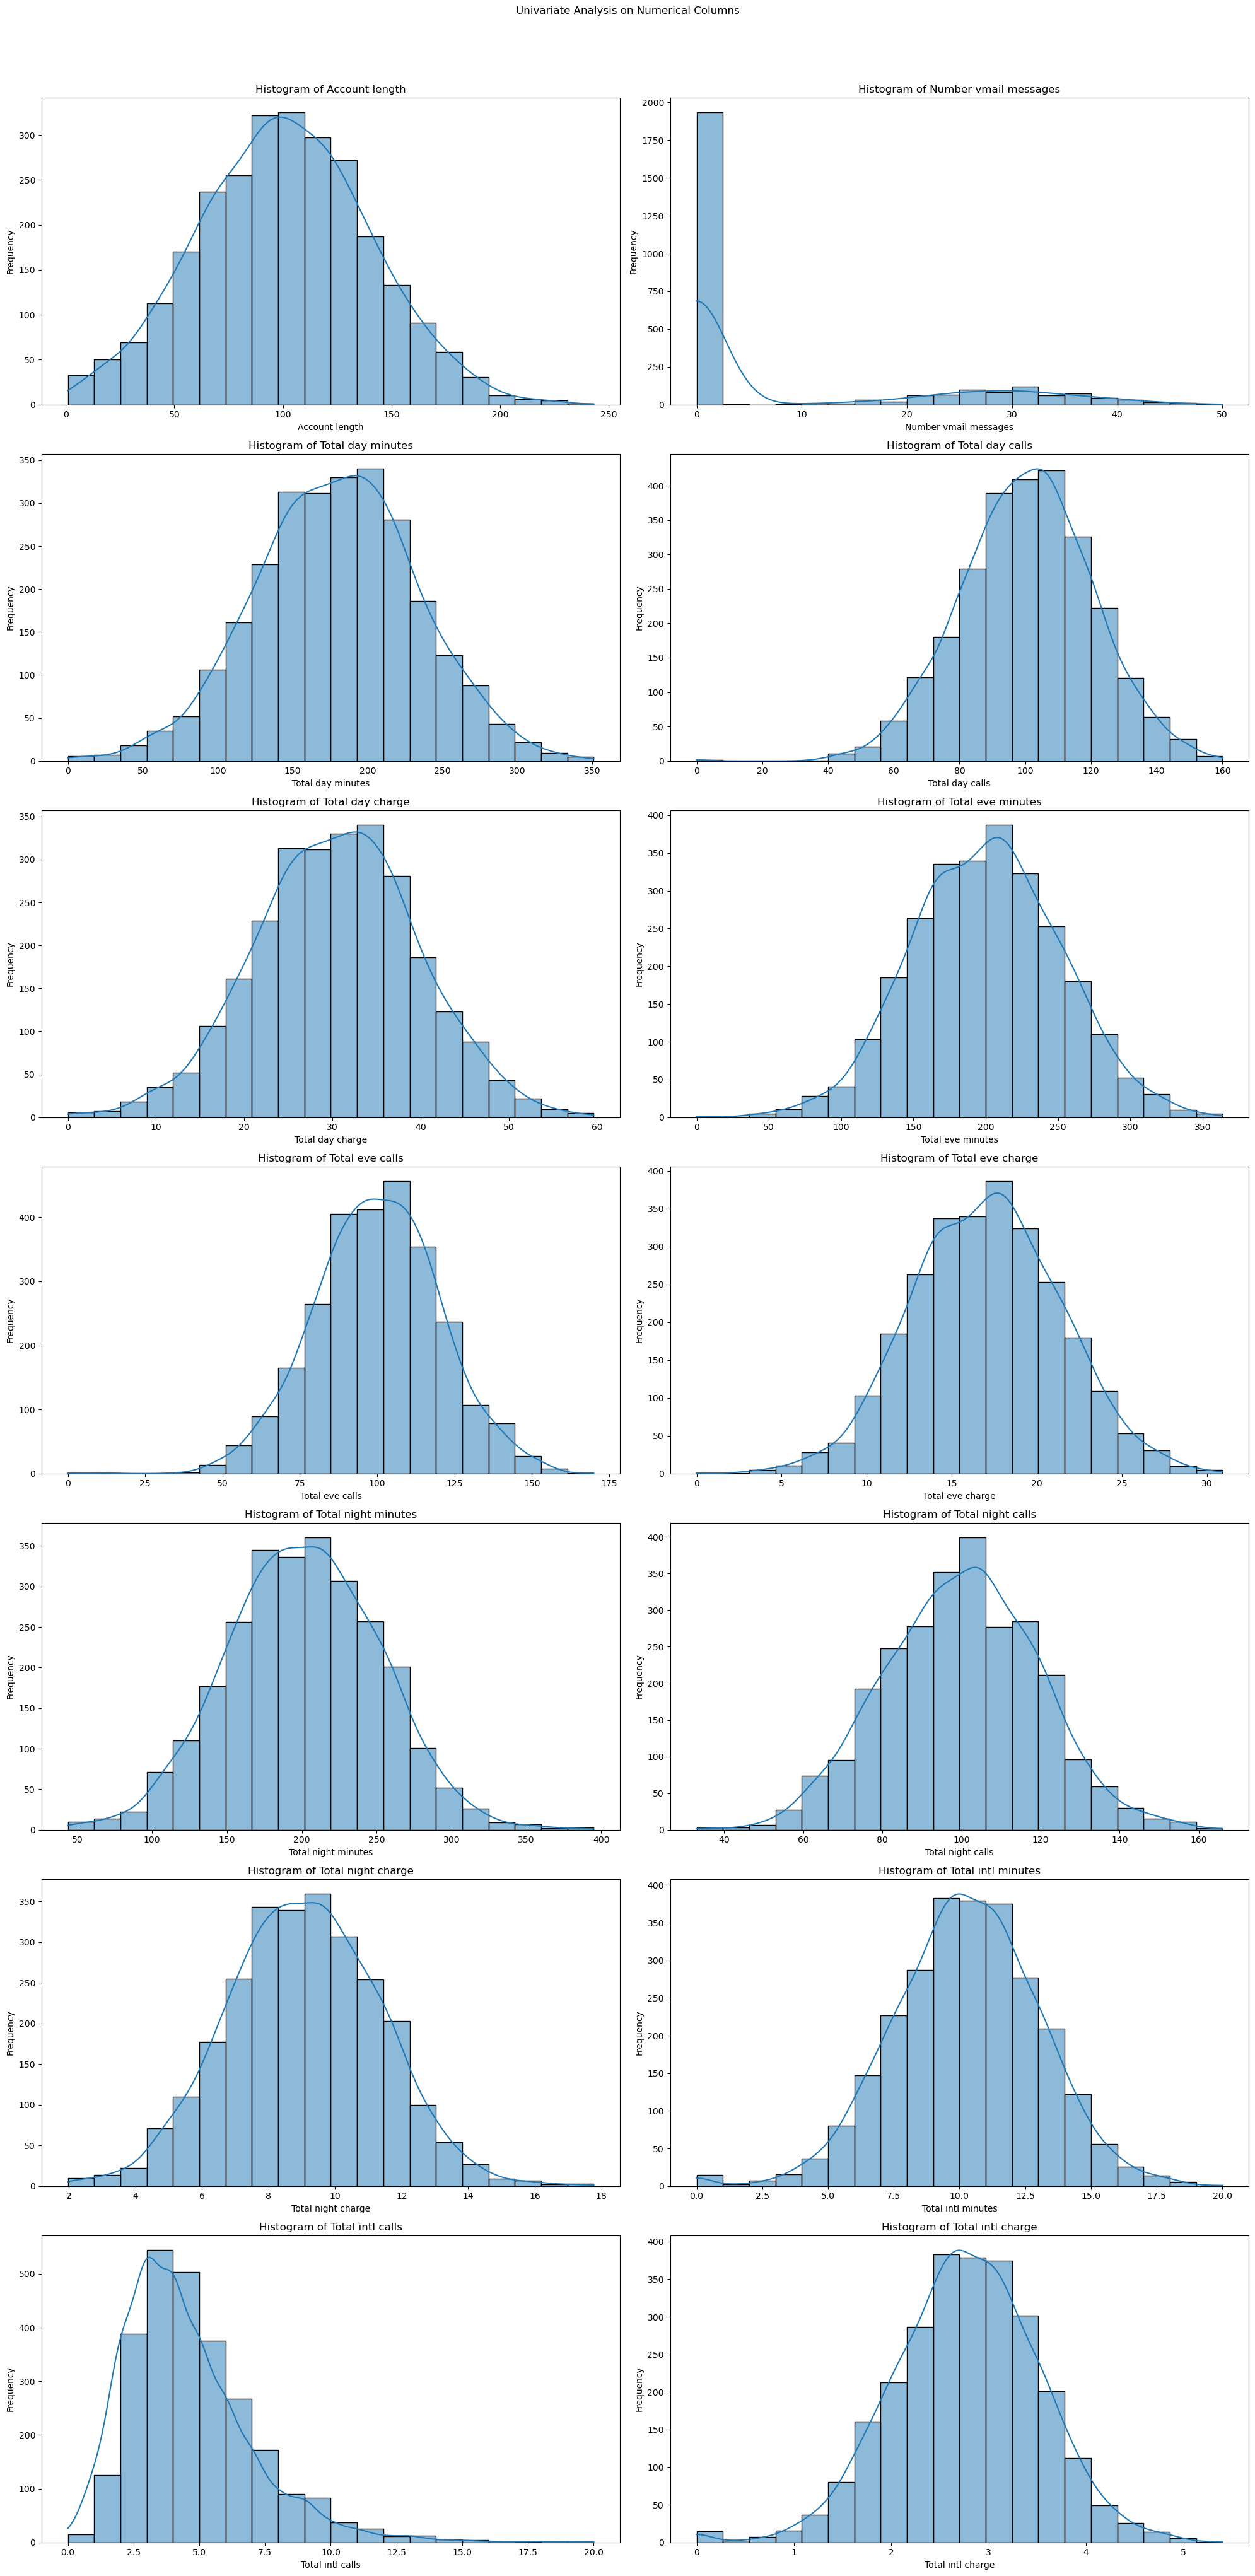

In [11]:
continuous_variables = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        if len(df[column].unique()) > 20:
            continuous_variables.append(column)
num_plots = len(continuous_variables)
num_cols = 2  
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))
fig.suptitle('Univariate Analysis on Numerical Columns', y=1.02)

for i, variable in enumerate(continuous_variables):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[variable], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


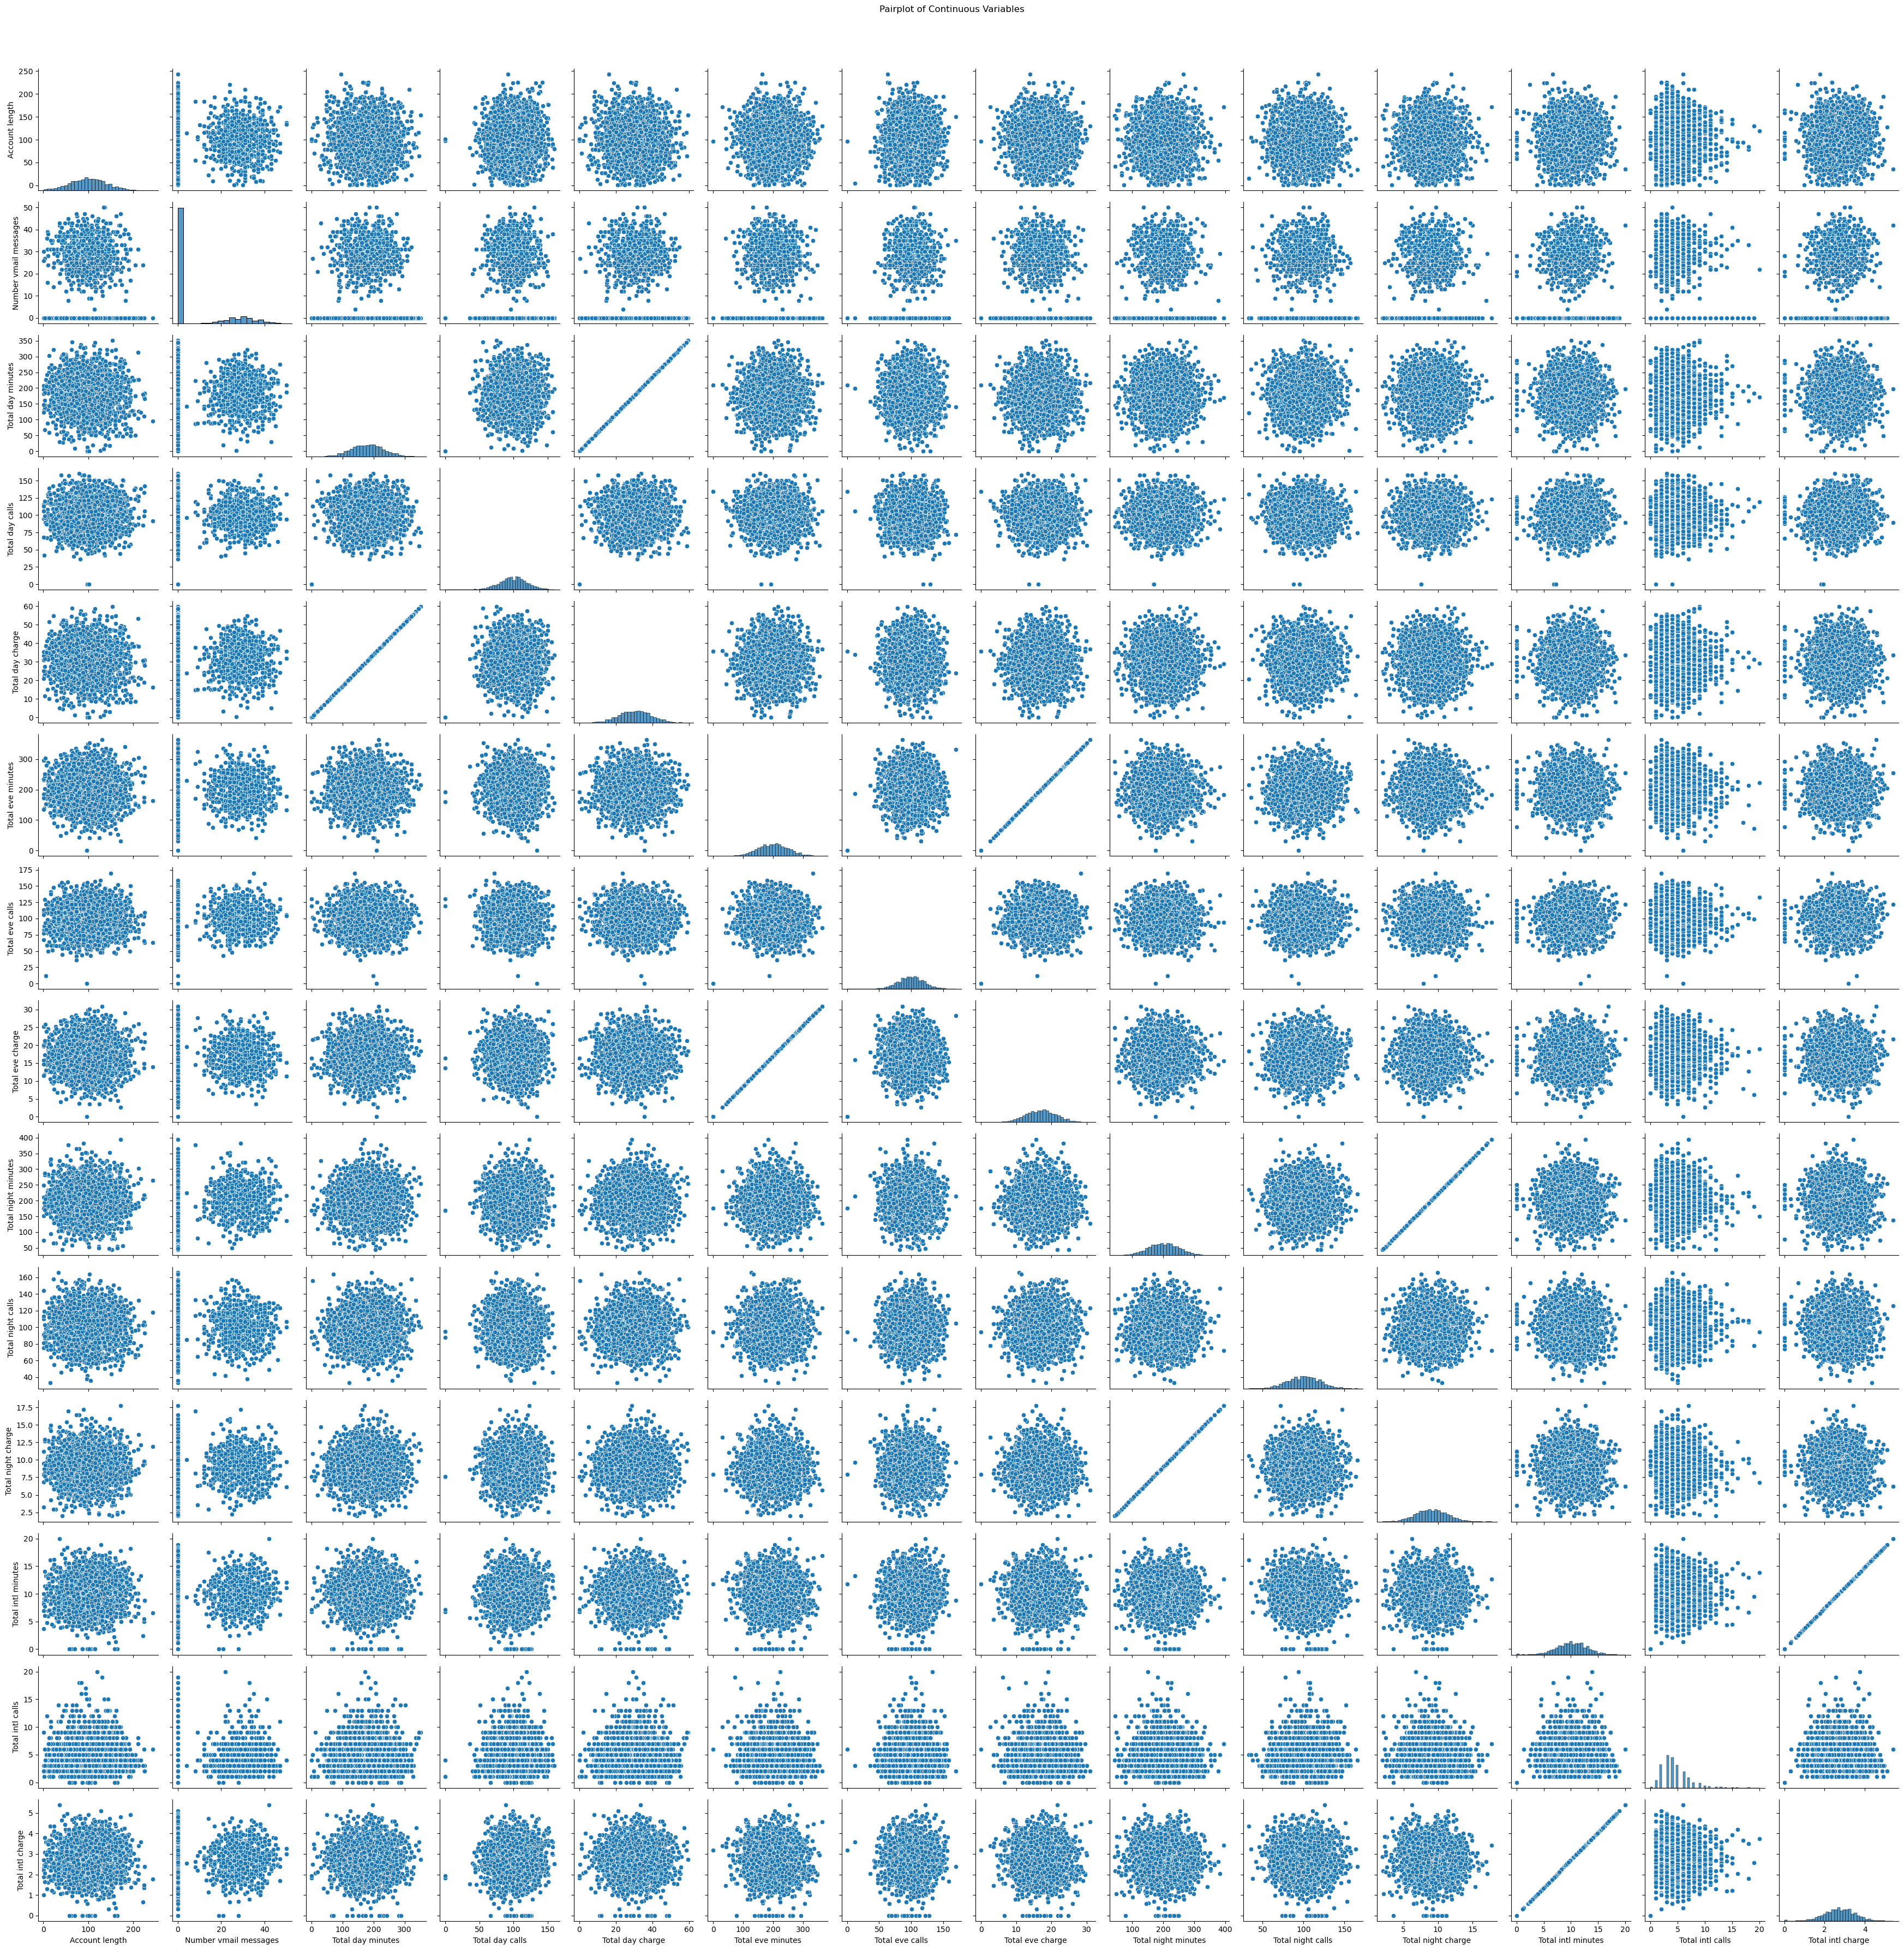

In [12]:
continuous_variables = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        if len(df[column].unique()) > 20:
            continuous_variables.append(column)
sns.pairplot(df[continuous_variables])
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.tight_layout()
plt.show()

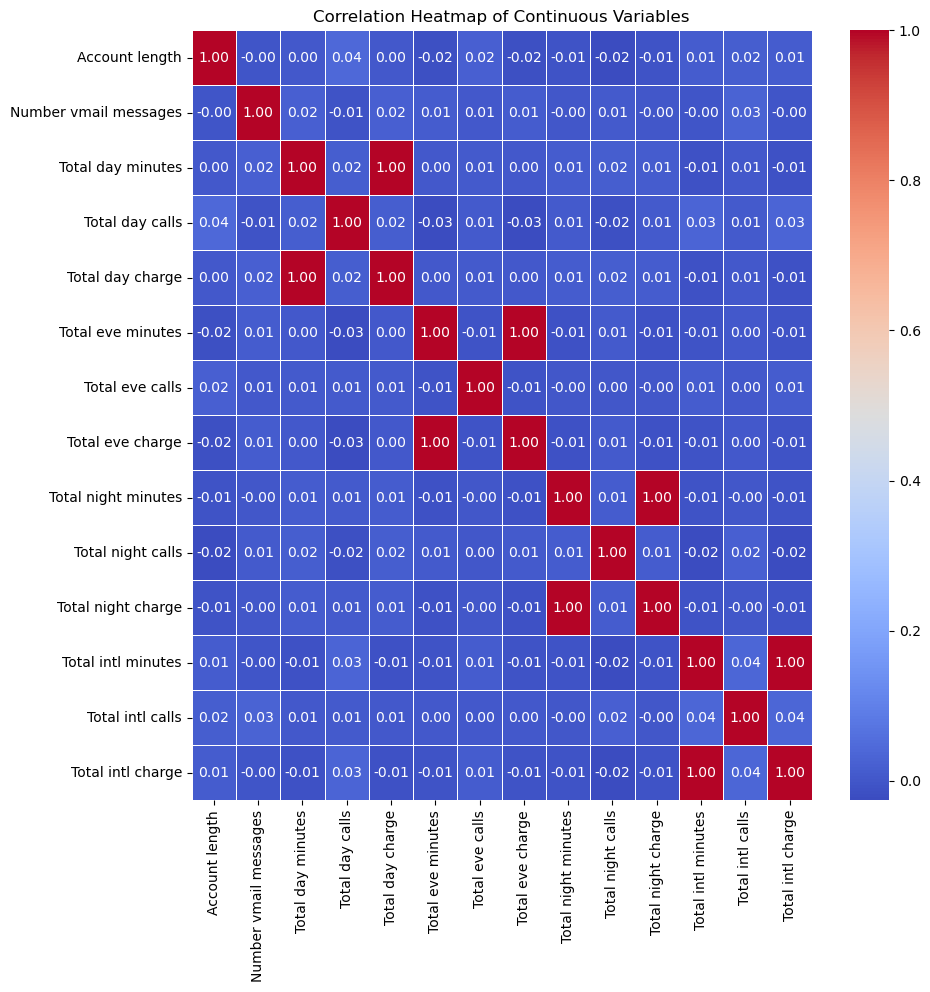

In [13]:
continuous_variables = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        if len(df[column].unique()) > 20:
            continuous_variables.append(column)
            
correlation_matrix = df[continuous_variables].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

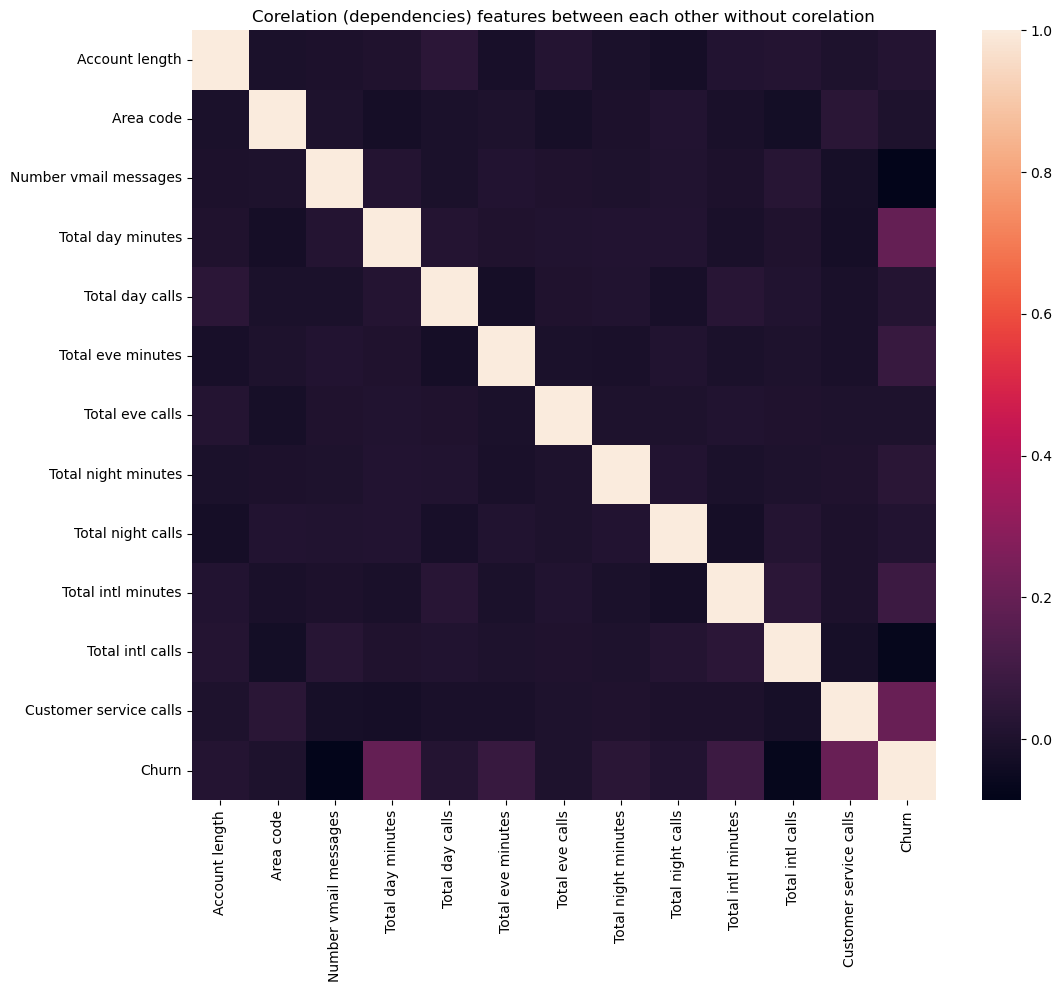

In [14]:
# Drop `Total day/eve/night/intl charge`
df.drop([f for f in df.columns if "charge" in f], axis=1, inplace=True)

# Define size of plot and title
plt.figure(figsize=(12,10))
plt.title("Corelation (dependencies) features between each other without corelation")

sns.heatmap(df.corr());

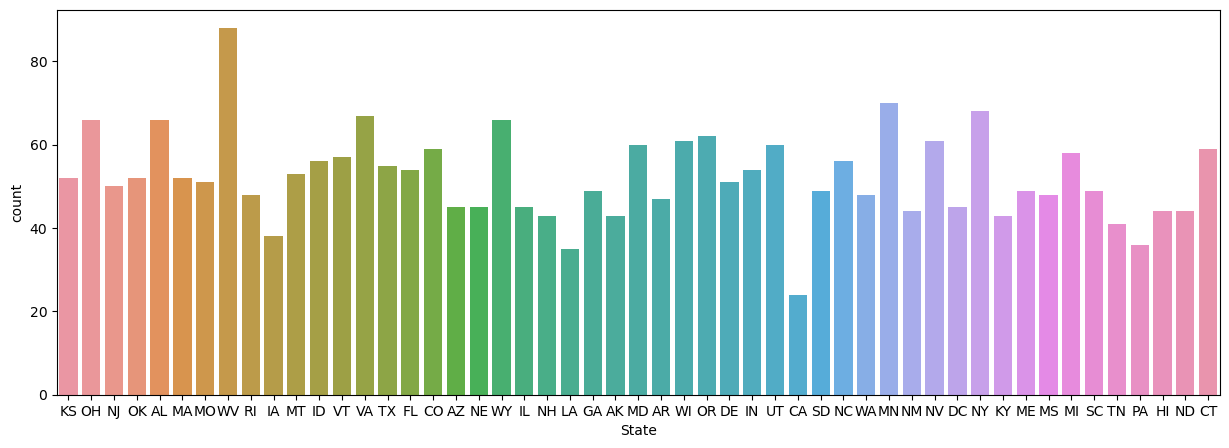

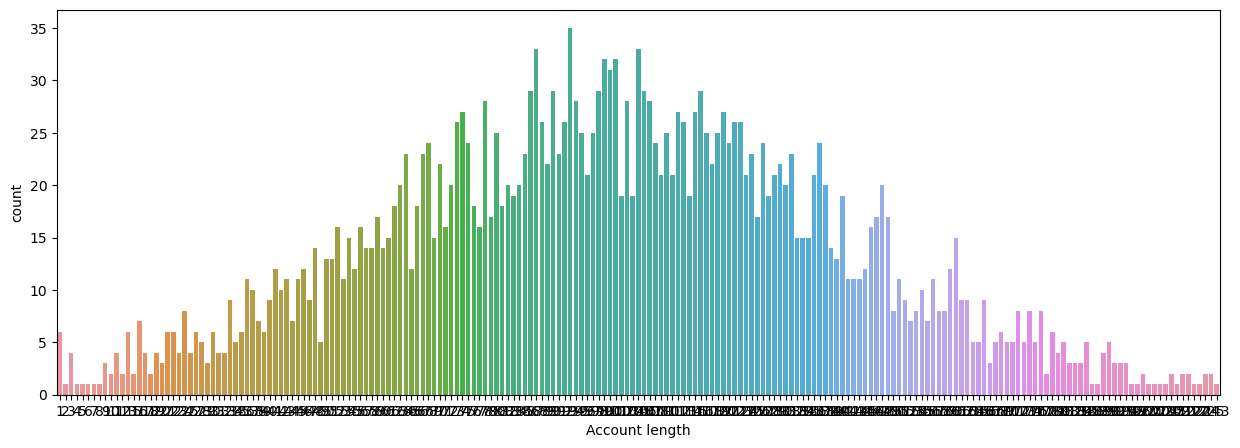

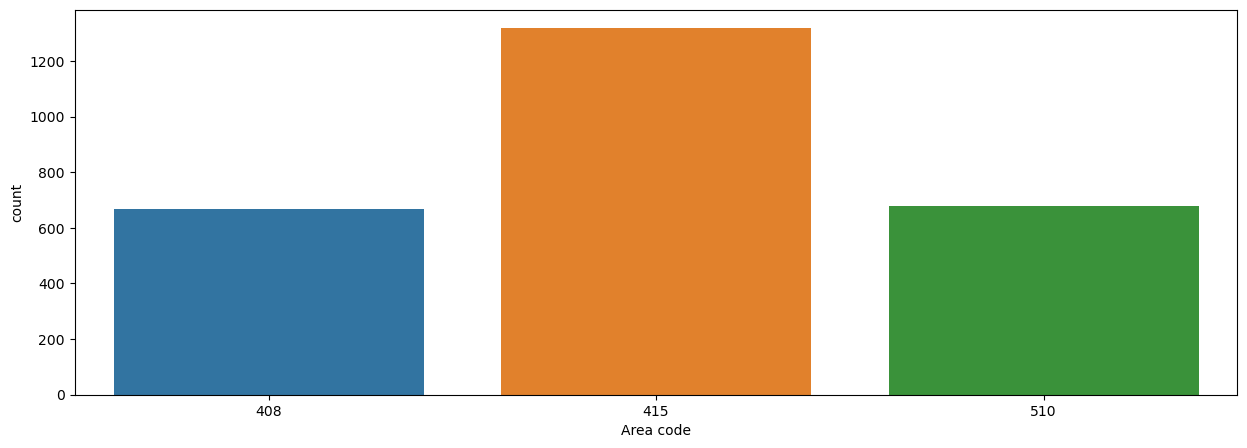

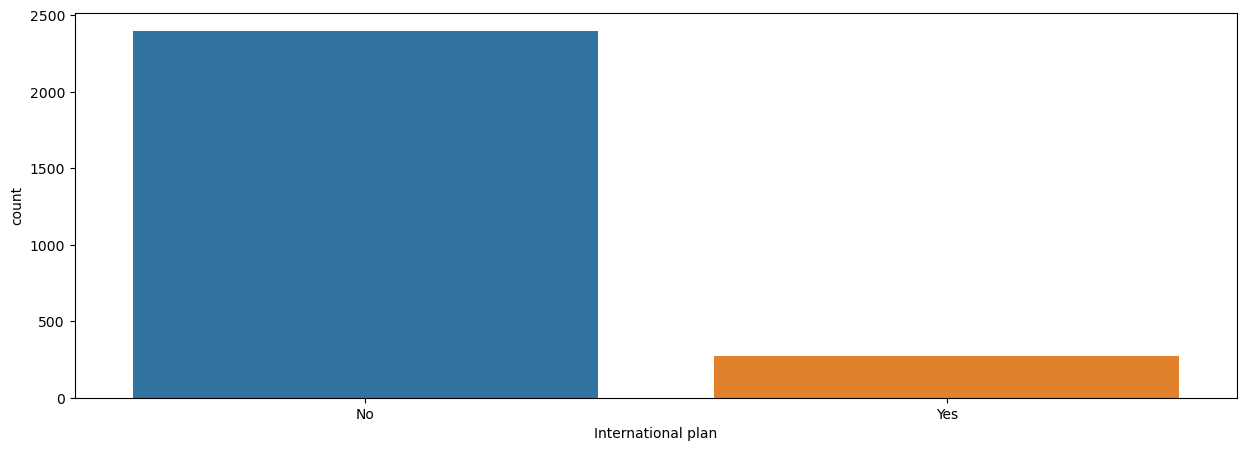

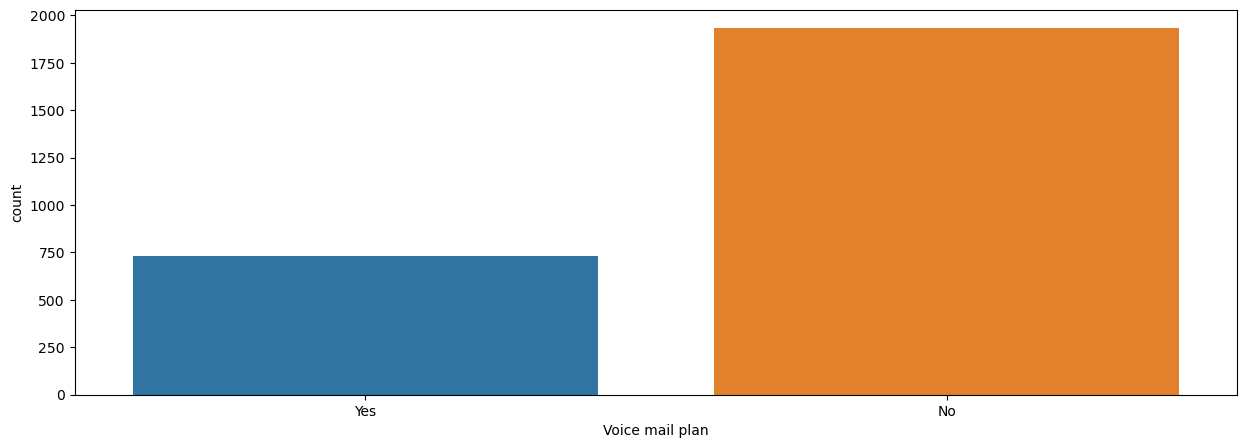

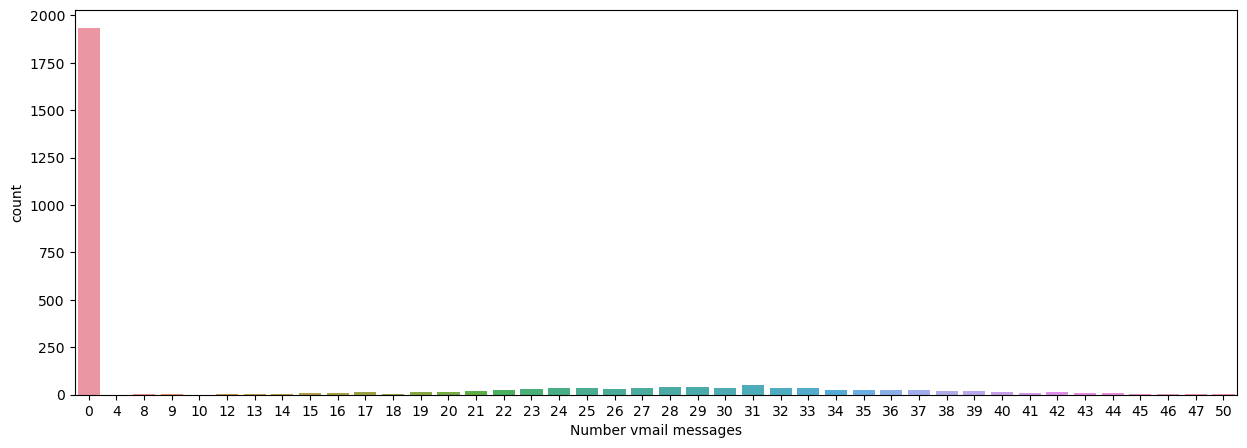

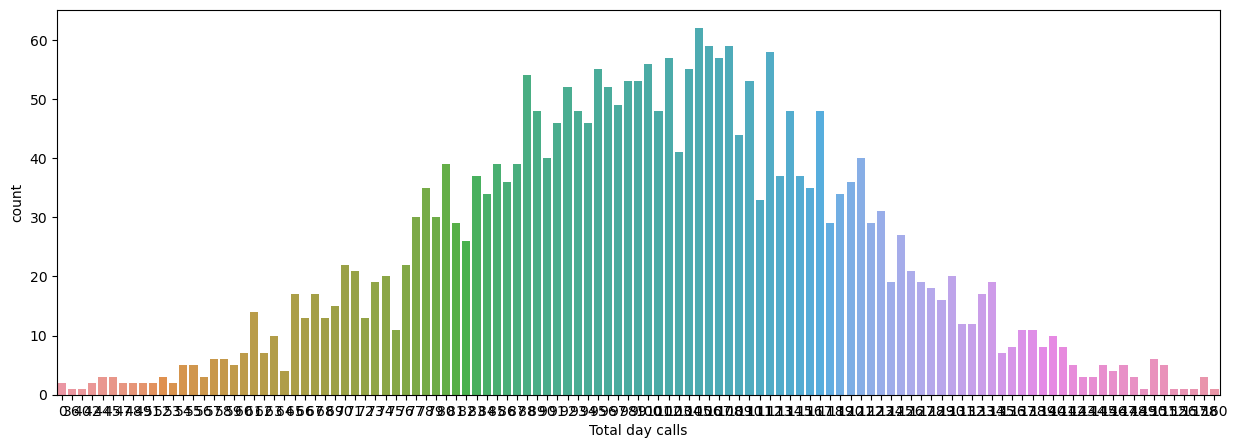

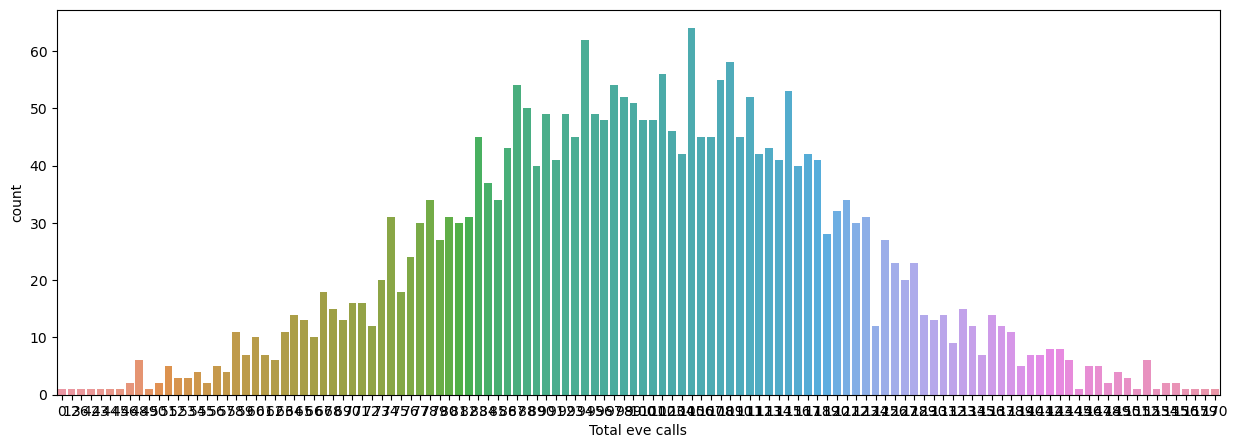

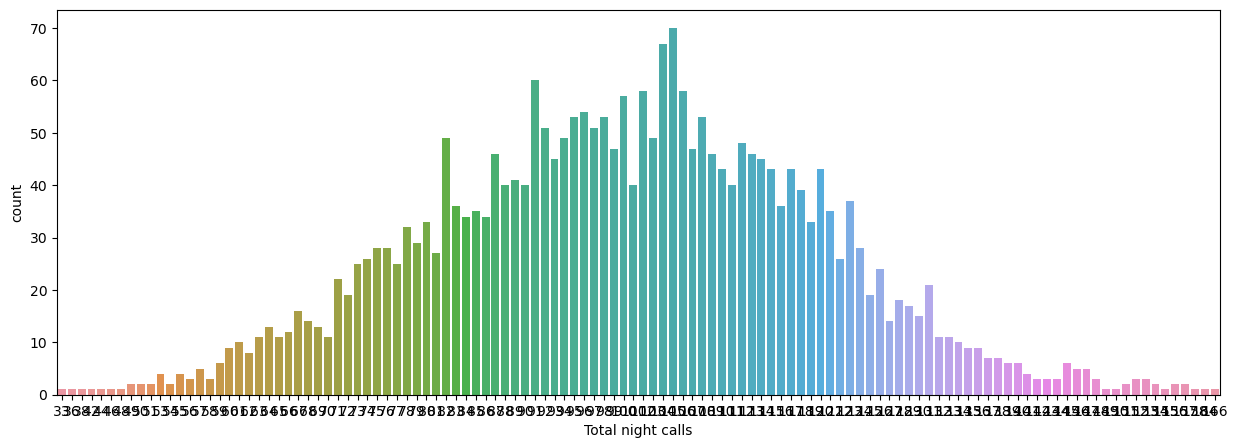

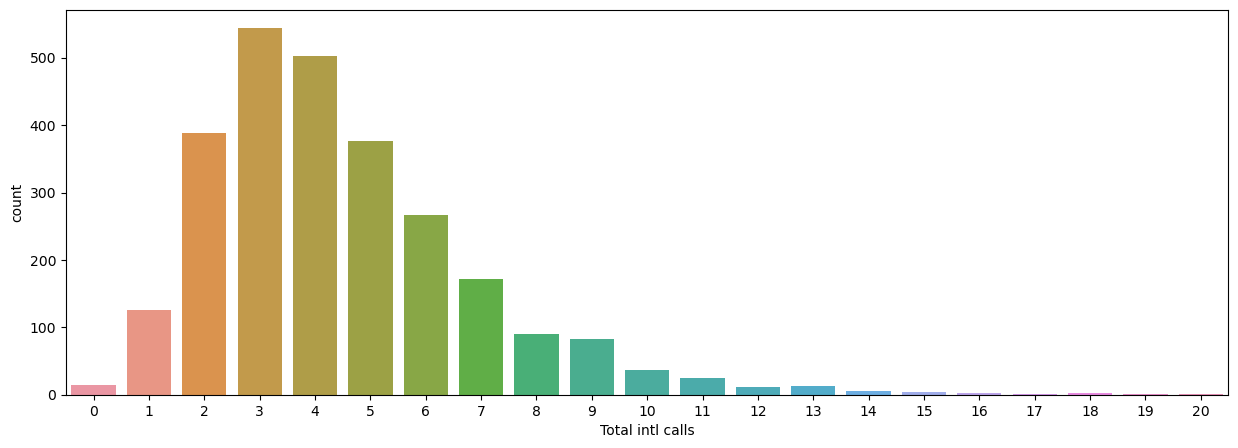

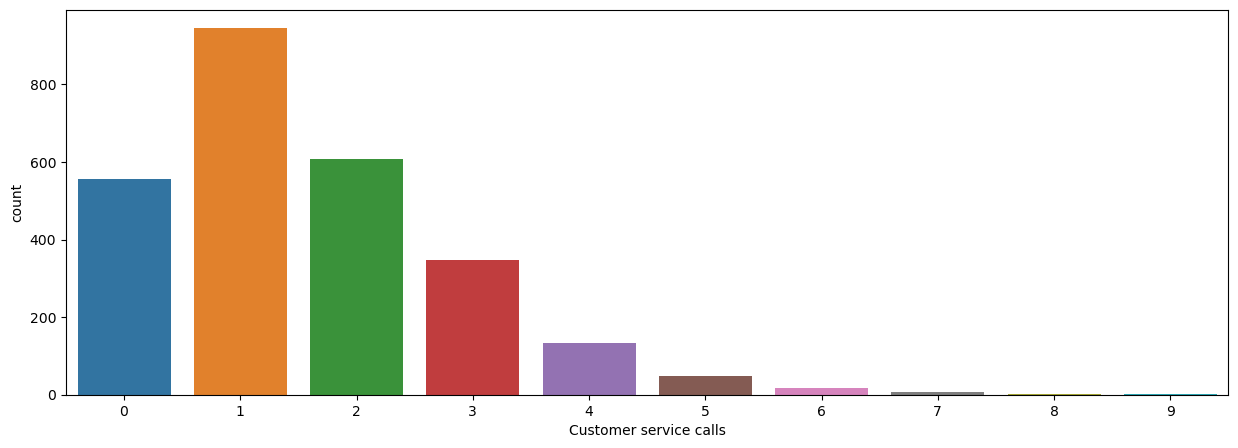

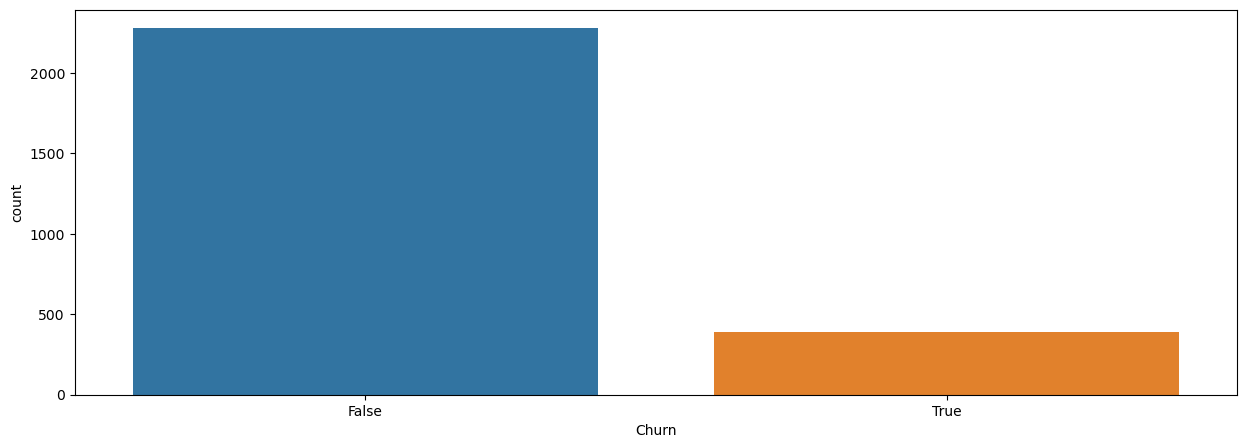

In [15]:
cat_col_name = []
for col_name in df.columns:
    if (df[col_name].dtypes!=int) and (df[col_name].dtypes!=float):
        cat_col_name.append(col_name)
        plt.figure(figsize=(15, 5))
        sns.countplot(x=col_name, data=df)
        plt.show()

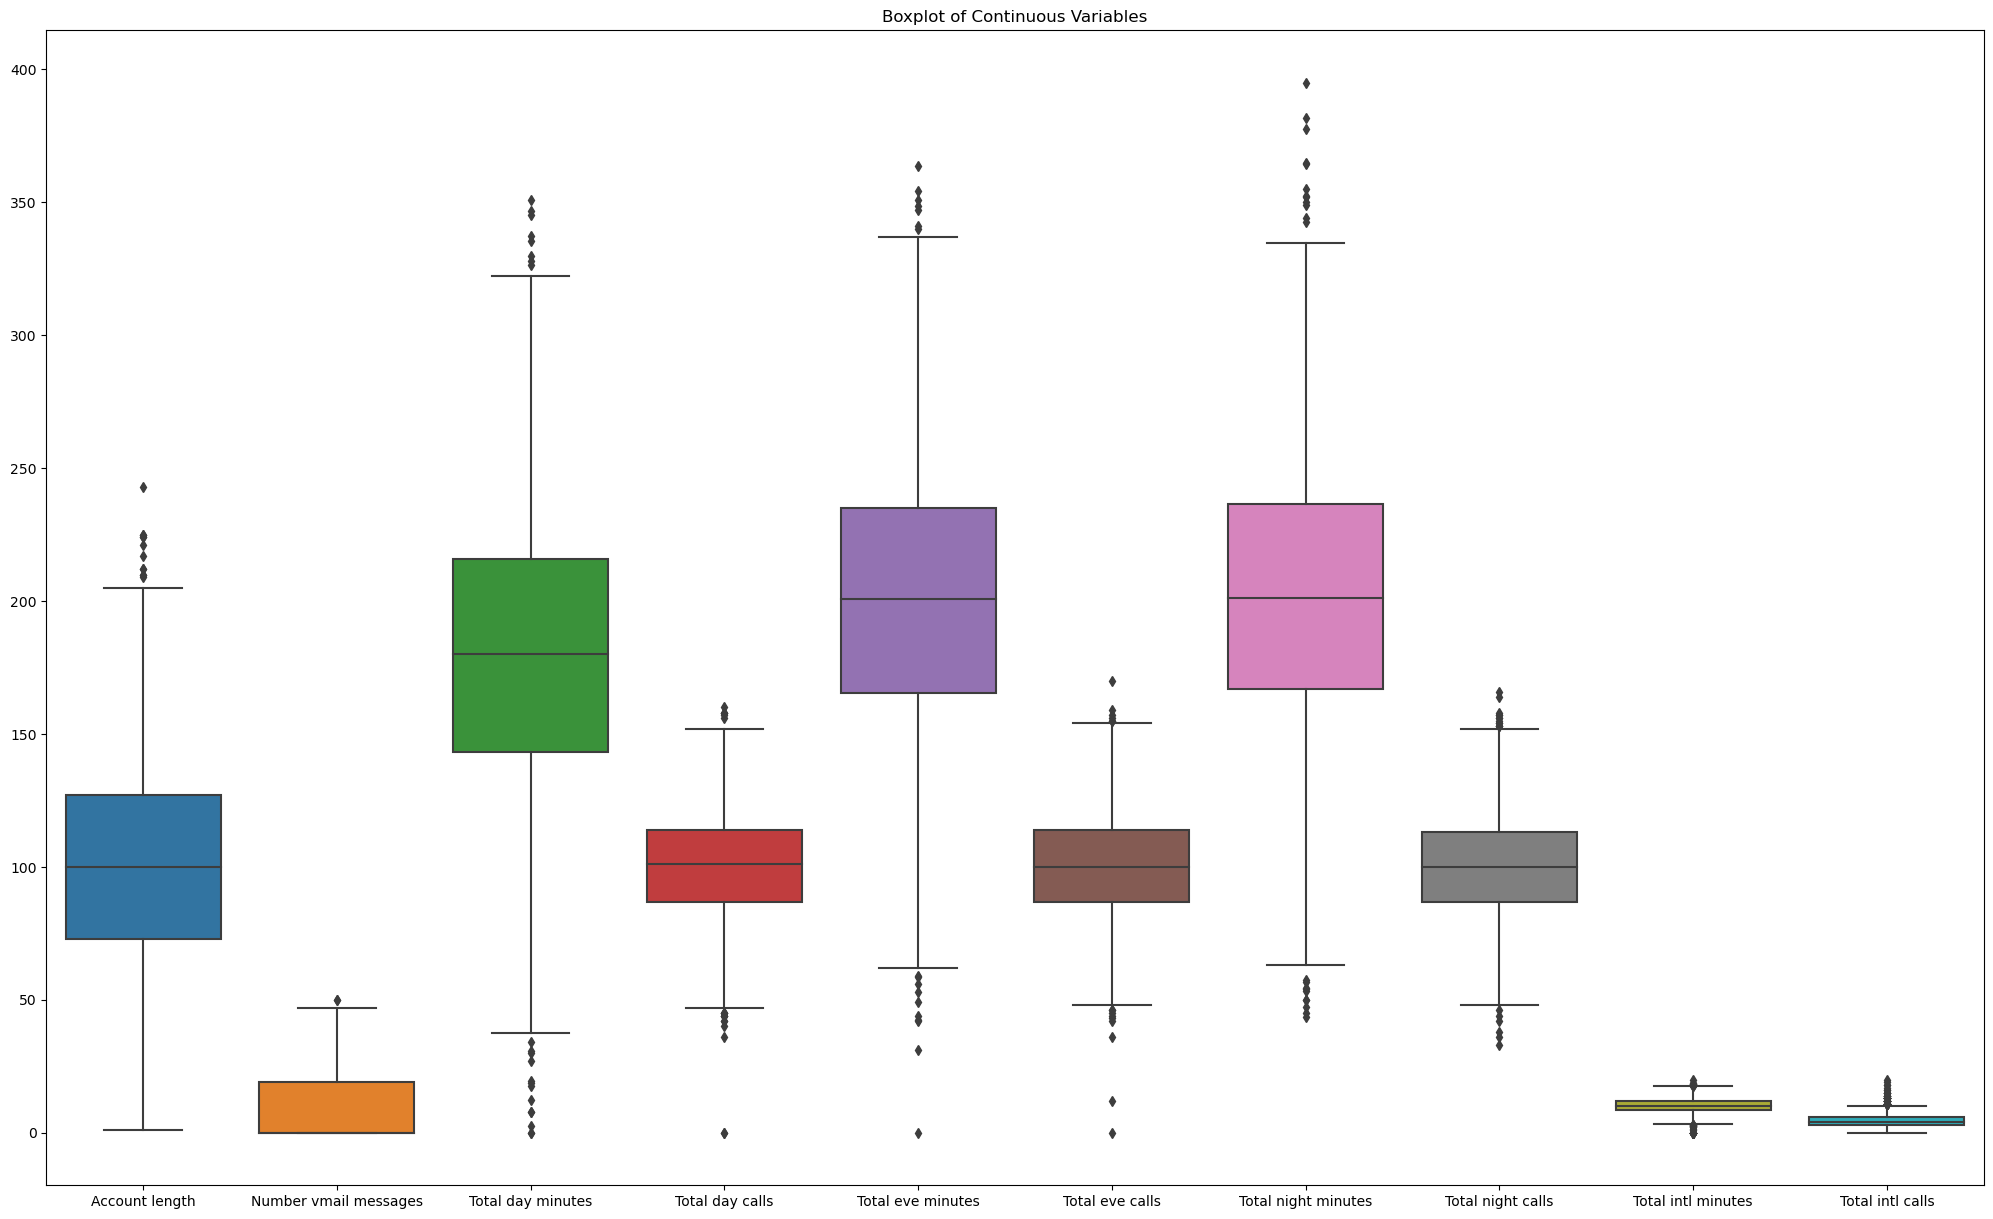

In [16]:
continuous_variables = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        if len(df[column].unique()) > 20:
            continuous_variables.append(column)

plt.figure(figsize=(25, 15))
sns.boxplot(data=df[continuous_variables])

plt.title('Boxplot of Continuous Variables')

plt.show()


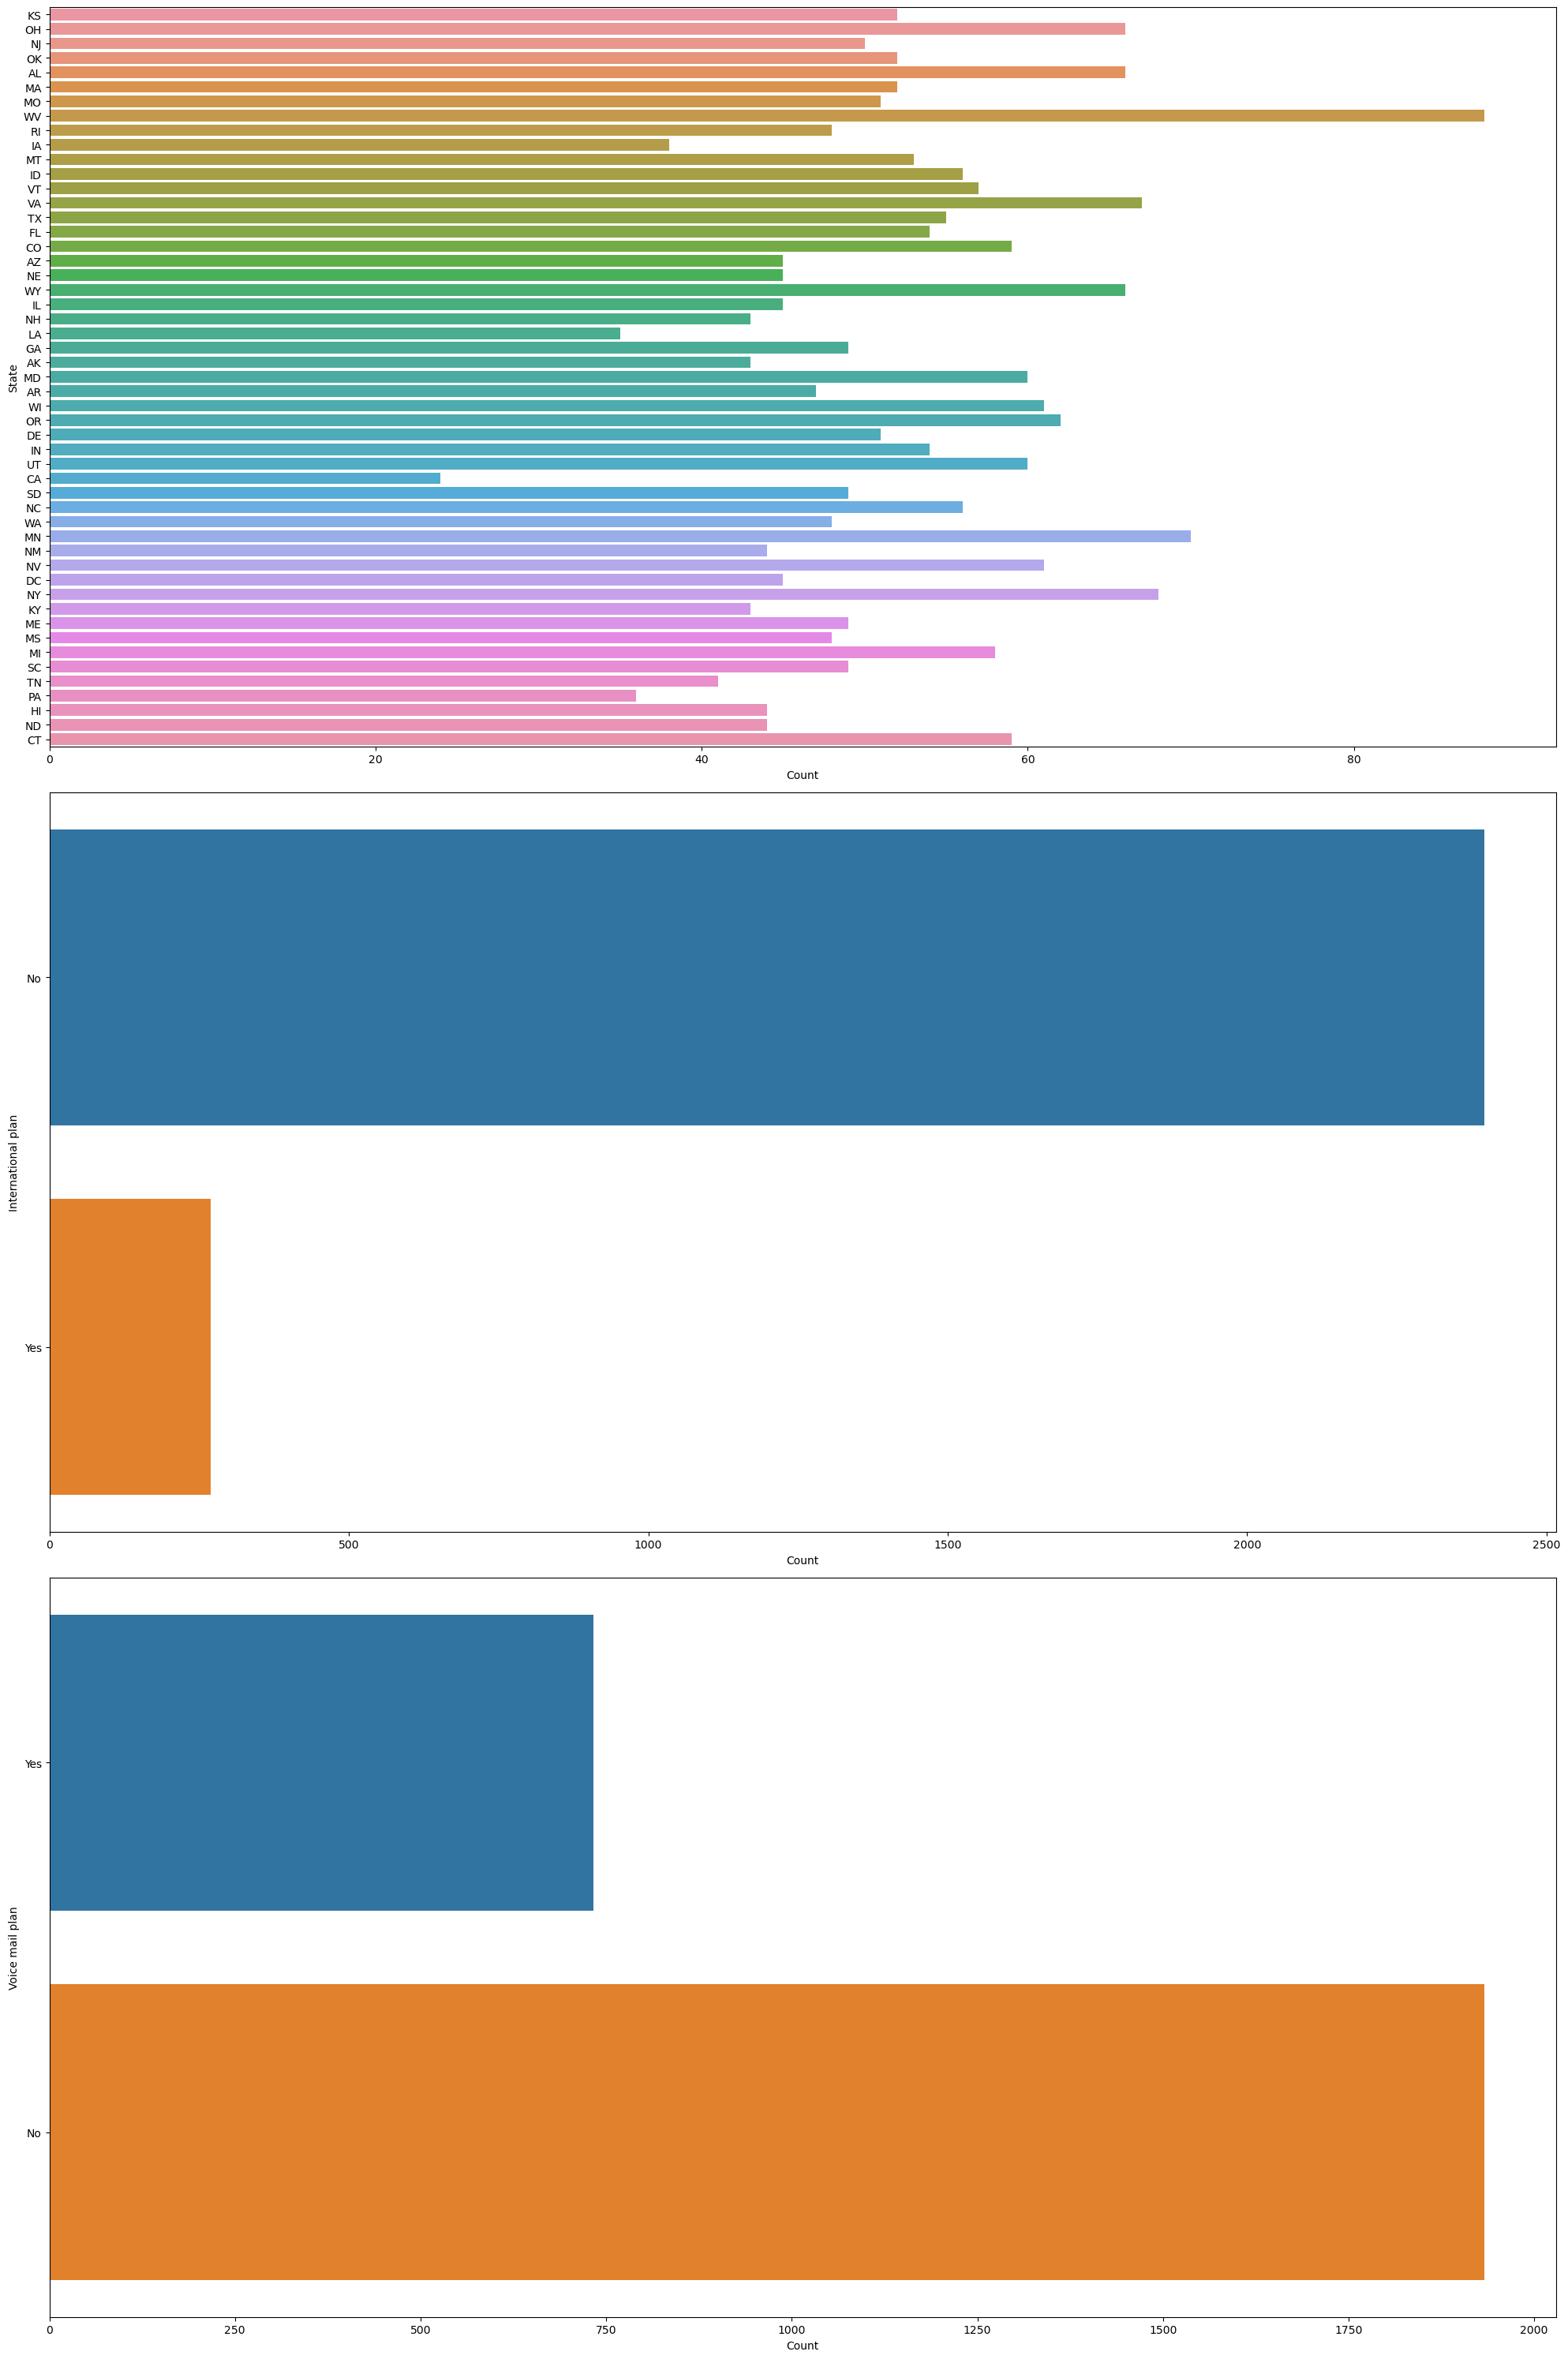

In [17]:
discrete_categorical_variables = ['State']  
for column in df.columns:
    if df[column].dtype == 'object' and len(df[column].unique()) <= 10:
        discrete_categorical_variables.append(column)

# Assuming you want each count plot in a separate subplot
num_plots = len(discrete_categorical_variables)
num_cols = 1
num_rows = num_plots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10 * num_rows))

for i, variable in enumerate(discrete_categorical_variables):
    sns.countplot(y=variable, data=df, ax=axes[i])
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(variable)

plt.tight_layout()
plt.show()


In [18]:
continuous_variables = []
discrete_variables = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        if len(df[column].unique()) > 20:
            continuous_variables.append(column)
        else:
            discrete_variables.append(column)

print("Continuous Variables:", continuous_variables)
print("Discrete Variables:", discrete_variables)

Continuous Variables: ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls']
Discrete Variables: ['Area code', 'Customer service calls']


In [19]:
discrete_categorical_variables = []

for column in df.columns:
    if df[column].dtype == 'object' and len(df[column].unique()) <= 20:
        discrete_categorical_variables.append(column)
discrete_categorical_stats = df[discrete_categorical_variables].describe(include='object')

print("Discrete Categorical Variables:")
print(discrete_categorical_stats)

Discrete Categorical Variables:
       International plan Voice mail plan
count                2666            2666
unique                  2               2
top                    No              No
freq                 2396            1933


In [20]:
df.describe(include='object')

State International plan Voice mail plan
count   2666               2666            2666
unique    51                  2               2
top       WV                 No              No
freq      88               2396            1933

In [21]:
df.describe(include='all')

State  Account length    Area code International plan Voice mail plan  \
count   2666     2666.000000  2666.000000               2666            2666   
unique    51             NaN          NaN                  2               2   
top       WV             NaN          NaN                 No              No   
freq      88             NaN          NaN               2396            1933   
mean     NaN      100.620405   437.438860                NaN             NaN   
std      NaN       39.563974    42.521018                NaN             NaN   
min      NaN        1.000000   408.000000                NaN             NaN   
25%      NaN       73.000000   408.000000                NaN             NaN   
50%      NaN      100.000000   415.000000                NaN             NaN   
75%      NaN      127.000000   510.000000                NaN             NaN   
max      NaN      243.000000   510.000000                NaN             NaN   

        Number vmail messages  Total day minutes  Total day calls  \
count             2666.000000         2666.00000      2666.000000   
unique                    NaN                NaN              NaN   
top                       NaN                NaN              NaN   
freq                      NaN                NaN              NaN   
mean                 8.021755          179.48162       100.310203   
std                 13.612277           54.21035        19.988162   
min                  0.000000            0.00000         0.000000   
25%                  0.000000          143.40000        87.000000   
50%                  0.000000          179.95000       101.000000   
75%                 19.000000          215.90000       114.000000   
max                 50.000000          350.80000       160.000000   

        Total eve minutes  Total eve calls  Total night minutes  \
count         2666.000000      2666.000000          2666.000000   
unique                NaN              NaN                  NaN   
top                   NaN              NaN                  NaN   
freq                  NaN              NaN                  NaN   
mean           200.386159       100.023631           201.168942   
std             50.951515        20.161445            50.780323   
min              0.000000         0.000000            43.700000   
25%            165.300000        87.000000           166.925000   
50%            200.900000       100.000000           201.150000   
75%            235.100000       114.000000           236.475000   
max            363.700000       170.000000           395.000000   

        Total night calls  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
unique                NaN                 NaN               NaN   
top                   NaN                 NaN               NaN   
freq                  NaN                 NaN               NaN   
mean           100.106152           10.237022          4.467367   
std             19.418459            2.788349          2.456195   
min             33.000000            0.000000          0.000000   
25%             87.000000            8.500000          3.000000   
50%            100.000000           10.200000          4.000000   
75%            113.000000           12.100000          6.000000   
max            166.000000           20.000000         20.000000   

        Customer service calls  Churn  
count              2666.000000   2666  
unique                     NaN      2  
top                        NaN  False  
freq                       NaN   2278  
mean                  1.562641    NaN  
std                   1.311236    NaN  
min                   0.000000    NaN  
25%                   1.000000    NaN  
50%                   1.000000    NaN  
75%                   2.000000    NaN  
max                   9.000000    NaN

In [22]:
df['State'].value_counts()

WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64

In [23]:
df['State'].nunique()

51

In [24]:
df['Account length'].value_counts()

93     35
105    33
87     33
101    32
99     32
       ..
186     1
6       1
195     1
243     1
221     1
Name: Account length, Length: 205, dtype: int64

In [25]:
df['Account length'].nunique()

205

In [26]:
df['Area code'].value_counts()

415    1318
510     679
408     669
Name: Area code, dtype: int64

In [27]:
df['Area code'].nunique()

3

In [28]:
df['International plan'].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

In [29]:
df['International plan'].nunique()

2

In [30]:
df['Voice mail plan'].value_counts()

No     1933
Yes     733
Name: Voice mail plan, dtype: int64

In [31]:
df['Voice mail plan'].nunique()

2

In [32]:
df['Number vmail messages'].value_counts()

0     1933
31      50
28      42
29      39
24      37
33      37
30      35
27      34
25      33
32      33
26      32
23      30
37      25
22      24
35      24
34      23
36      23
38      22
39      22
21      22
20      14
19      14
42      13
40      13
17      12
16      11
43       9
15       8
44       7
41       7
18       6
12       6
14       5
45       4
46       3
47       3
13       3
8        2
50       2
9        2
4        1
10       1
Name: Number vmail messages, dtype: int64

In [33]:
df['Number vmail messages'].nunique()

42

In [34]:
df['Total day minutes'].value_counts()

162.3    7
183.4    7
216.0    6
175.4    6
159.5    6
        ..
209.6    1
247.0    1
321.3    1
150.9    1
180.8    1
Name: Total day minutes, Length: 1489, dtype: int64

In [35]:
df['Total day minutes'].nunique()

1489

In [36]:
df['Total day calls'].value_counts()

105    62
106    59
108    59
112    58
102    57
       ..
152     1
40      1
156     1
157     1
149     1
Name: Total day calls, Length: 115, dtype: int64

In [37]:
df['Total day calls'].nunique()

115

In [41]:
df['Total eve minutes'].value_counts()

169.9    8
220.6    7
167.2    7
161.7    7
224.9    6
        ..
125.8    1
277.9    1
269.5    1
124.2    1
265.9    1
Name: Total eve minutes, Length: 1442, dtype: int64

In [42]:
df['Total eve minutes'].nunique()

1442

In [43]:
df['Total eve calls'].value_counts()

105    64
94     62
109    58
102    56
108    55
       ..
49      1
157     1
12      1
151     1
170     1
Name: Total eve calls, Length: 120, dtype: int64

In [44]:
df['Total eve calls'].nunique()

120

In [47]:
df['Total night minutes'].value_counts()

214.7    7
181.2    6
172.7    6
210.0    6
214.0    6
        ..
63.6     1
111.6    1
381.9    1
186.1    1
191.3    1
Name: Total night minutes, Length: 1444, dtype: int64

In [48]:
df['Total night minutes'].nunique()

1444

In [49]:
df['Total night calls'].value_counts()

105    70
104    67
91     60
106    58
102    58
       ..
38      1
36      1
150     1
48      1
164     1
Name: Total night calls, Length: 118, dtype: int64

In [50]:
df['Total night calls'].nunique()

118

In [53]:
df['Customer service calls'].value_counts()

1    945
2    608
0    555
3    348
4    133
5     49
6     17
7      8
9      2
8      1
Name: Customer service calls, dtype: int64

In [54]:
df['Customer service calls'].nunique()

10

In [55]:
df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [56]:
df['Churn'].nunique()

2

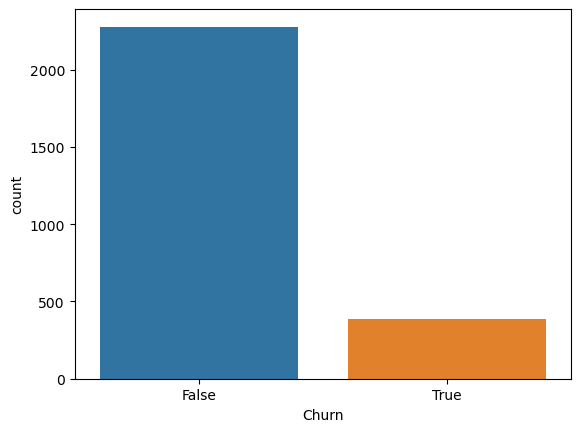

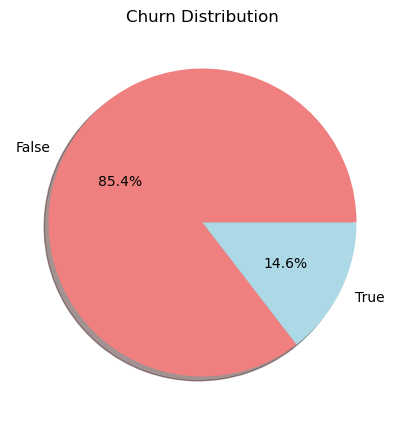

In [57]:
sns.countplot(x=df.Churn)

churn_distribution = df['Churn'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], shadow=True)
plt.title('Churn Distribution')
plt.show()


# Modifying the wrong data

#### missing values

In [58]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total eve minutes         0
Total eve calls           0
Total night minutes       0
Total night calls         0
Total intl minutes        0
Total intl calls          0
Customer service calls    0
Churn                     0
dtype: int64

In [59]:
df.isnull().sum()/len(df)*100

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total eve minutes         0.0
Total eve calls           0.0
Total night minutes       0.0
Total night calls         0.0
Total intl minutes        0.0
Total intl calls          0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

In [60]:
df[df.duplicated()]

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total eve minutes, Total eve calls, Total night minutes, Total night calls, Total intl minutes, Total intl calls, Customer service calls, Churn]
Index: []

In [61]:
df[df.duplicated()].nunique()/100

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total eve minutes         0.0
Total eve calls           0.0
Total night minutes       0.0
Total night calls         0.0
Total intl minutes        0.0
Total intl calls          0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

In [62]:
df[df.duplicated()]

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total eve minutes, Total eve calls, Total night minutes, Total night calls, Total intl minutes, Total intl calls, Customer service calls, Churn]
Index: []

# Encoding

In [63]:
import pandas as pd
df = pd.read_csv("D:\churn-bigml-80.csv")
df['International plan'] = df['International plan'].map({'No': 0, 'Yes': 1}).fillna(df['International plan']).astype(int)
df['Churn'] = df['Churn'].map({'False': 0, 'True': 1}).fillna(df['Churn']).astype(int)


In [64]:
df['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [65]:
df['International plan'].value_counts()

0    2396
1     270
Name: International plan, dtype: int64

# data type conversion

In [66]:
import pandas as pd
df = pd.read_csv("D:\churn-bigml-80.csv")
df['Churn'] = df['Churn'].astype(int)
print(df.dtypes)

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int32
dtype: object


In [67]:
skewness_values = df[continuous_variables].skew()
print("Skewness for Continuous Variables:")
print(skewness_values)


Skewness for Continuous Variables:
Account length           0.079023
Number vmail messages    1.271774
Total day minutes       -0.053106
Total day calls         -0.128267
Total eve minutes       -0.012665
Total eve calls         -0.065209
Total night minutes      0.023362
Total night calls        0.010410
Total intl minutes      -0.224434
Total intl calls         1.358769
dtype: float64


# X & y

In [68]:
x = df.drop('Churn', axis=1)
y = df['Churn']

# Identify The Best Random State Number

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
categorical_cols = [col for col in x.columns if x[col].dtype == 'object']
numeric_cols = [col for col in x.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols) 
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

train = []
test = []
cv = []

for i in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    pipeline.fit(x_train, y_train)

    train.append(pipeline.score(x_train, y_train))
    test.append(pipeline.score(x_test, y_test))
    cv.append(cross_val_score(pipeline, x, y, cv=5).mean())

em = pd.DataFrame({"Train": train, "Test": test, "CV": cv})
gm = em[(abs(em['Train'] - em['Test']) <= 0.05) & (abs(em['Test'] - em['CV']) <= 0.05)]

index_with_max_test_score = gm[gm['Test'] == gm['Test'].max()].index.tolist()[0]

print(index_with_max_test_score)



4


# Train | Test Split

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=39)

In [71]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are your feature datasets
# Identify numeric columns
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns

# Create StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])

# Transform on test data using the parameters from the training data
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])




## Modelling

# Logistic Regression

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['State', 'International plan', 'Voice mail plan'], dtype='object'))])),
                ('classifier', LogisticRegression())])

# Evaluation

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Assuming x_train and y_train are your training data
# Assuming x_test is your test data

# Identify numeric and categorical columns
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = make_pipeline(preprocessor, LogisticRegression())

pipeline.fit(x_train, y_train)

ypred_train = pipeline.predict(x_train)
train_accuracy = accuracy_score(y_train, ypred_train)
print("Train accuracy:", train_accuracy)

cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')
print("Cross Score:", cv_scores.mean())

ypred_test = pipeline.predict(x_test)
test_accuracy = accuracy_score(y_test, ypred_test)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.8681988742964353
Cross Score: 0.8564699673450539
Test accuracy: 0.8857677902621723


# Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and ypred_test are your true labels and predicted labels
cm = confusion_matrix(y_test, ypred_test)
print(cm)


[[450  12]
 [ 49  23]]


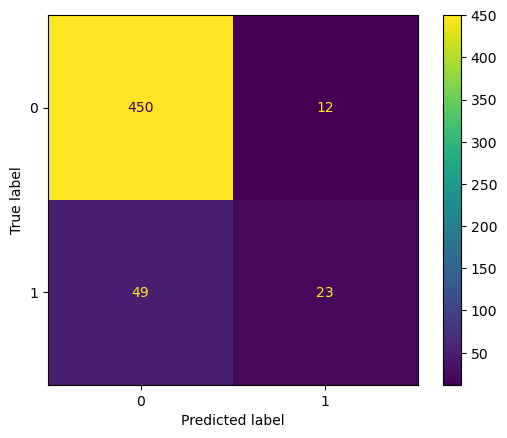

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming cm is your confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["Churn"].unique()).plot()
plt.show()


# Classification Report

In [76]:
from sklearn.metrics import classification_report

# Assuming y_test and ypred_test are your true labels and predicted labels
print(classification_report(y_test, ypred_test))


              precision    recall  f1-score   support

           0       0.90      0.97      0.94       462
           1       0.66      0.32      0.43        72

    accuracy                           0.89       534
   macro avg       0.78      0.65      0.68       534
weighted avg       0.87      0.89      0.87       534



# ROC Curve

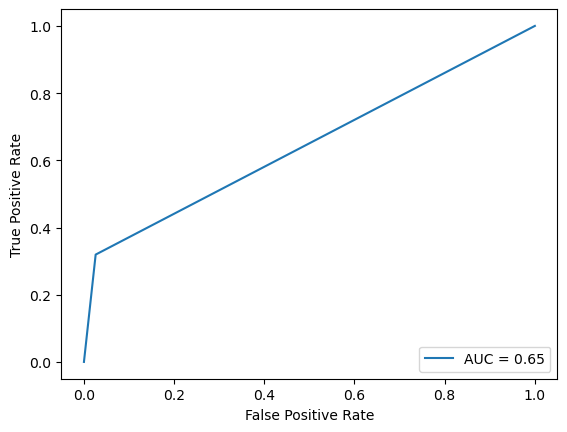

In [77]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, ypred_test)
roc_auc = auc(fpr, tpr)

# Use correct argument names in RocCurveDisplay
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Correct typo in plt.show()
plt.show()



# AUC Score

In [78]:
from sklearn.metrics import roc_auc_score

# Assuming y_test and ypred_test are your true labels and predicted labels
roc_auc = roc_auc_score(y_test, ypred_test)
print("ROC AUC Score:", roc_auc)



ROC AUC Score: 0.6467352092352092


# Hyperparameter Tuning for KNN Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': [1, 3, 5], 'classifier__weights': ['uniform', 'distance']}

cv_classifier = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
cv_classifier.fit(x_train, y_train)

print("Best parameters:", cv_classifier.best_params_)


Best parameters: {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}


# KNN model with best hyper parameters

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Assuming x_train, y_train, x_test, y_test are your training and testing data

# Identify numeric and categorical columns
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and KNeighborsClassifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit the model on the training data
knn_pipeline.fit(x_train, y_train)

# Predictions on the training and testing data
y_pred_train = knn_pipeline.predict(x_train)
y_pred_test = knn_pipeline.predict(x_test)

# Calculate and print accuracy scores
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# Cross-validation score
cv_score = cross_val_score(knn_pipeline, x, y, cv=5).mean()
print("Cross Validation Score:", cv_score)


Train Accuracy: 0.9141651031894934
Test Accuracy: 0.8951310861423221
Cross Validation Score: 0.8852211002663182


In [81]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_test are your true labels and predicted labels
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[459   3]
 [ 53  19]]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       462
           1       0.86      0.26      0.40        72

    accuracy                           0.90       534
   macro avg       0.88      0.63      0.67       534
weighted avg       0.89      0.90      0.87       534



In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=39)

# Support Vector Machines(SVM)

#### with default parameters

In [84]:
#modelling

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Assuming x_train and x_test are your feature datasets
# Assuming categorical_cols are the categorical columns

# Identify numeric and categorical columns
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Fit the model on the training data
svm_pipeline.fit(x_train, y_train)

# Predictions on the training and testing data
ypred_train = svm_pipeline.predict(x_train)
ypred_test = svm_pipeline.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))



Train Accuracy: 0.9423076923076923
Test Accuracy: 0.9119850187265918


# hyperparameter Tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'x' is your feature data and 'y' is your label data
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identify categorical columns in 'x' and apply one-hot encoding
categorical_cols = [col for col in x.columns if x[col].dtype == 'object']
numeric_cols = [col for col in x.columns if col not in categorical_cols]

# Create a ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),  # Pass through numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply one-hot encoding to categorical columns
    ])

# Create an SVM classifier
estimator = SVC()

# Create a pipeline that first applies preprocessing and then fits the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', estimator)
])

# Define the parameter distributions for RandomizedSearchCV
param_dist = {'classifier__C': [0.01, 0.1, 1, 10, 100],
              'classifier__kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model using the training data
random_search.fit(x_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Now you can use the best model for prediction on the test set
y_pred_random = random_search.predict(x_test)


Best Parameters: {'classifier__kernel': 'rbf', 'classifier__C': 100}
Best Accuracy: 0.8677309760200547


In [86]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming 'x' is your feature data and 'y' is your label data
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identify categorical columns in 'x' and apply one-hot encoding
categorical_cols = [col for col in x_train.columns if x_train[col].dtype == 'object']
numeric_cols = [col for col in x_train.columns if col not in categorical_cols]

# Create a ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),  # Pass through numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply one-hot encoding to categorical columns
    ])

# Create an SVM classifier
model = SVC(kernel='linear', C=100)

# Create a pipeline that first applies preprocessing and then fits the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the model using the training data
pipeline.fit(x_train, y_train)

# Make predictions on the training and test sets
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))


Training Accuracy: 0.8700750469043153
Test Accuracy: 0.846441947565543


# Modelling & Evaluation

Decision Tree Classifier - With DEfault Hyperparameters

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'x' is your feature data and 'y' is your label data
# Identify categorical columns in 'x' and apply one-hot encoding
categorical_cols = [col for col in x_train.columns if x_train[col].dtype == 'object']
numeric_cols = [col for col in x_train.columns if col not in categorical_cols]

# Create a ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),  # Pass through numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # Apply one-hot encoding to categorical columns
    ])

# Create a pipeline that first applies preprocessing and then fits the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Fit the model using the training data
pipeline.fit(x_train, y_train)

# Prediction
pred_train = pipeline.predict(x_train)
pred_test = pipeline.predict(x_test)

# Evaluation
print("Train accuracy:", accuracy_score(pred_train, y_train))
print("Test accuracy:", accuracy_score(pred_test, y_test))

# Cross-validation score
print("Cross-validation score:", cross_val_score(pipeline, x, y, cv=5).mean())


Train accuracy: 1.0
Test accuracy: 0.8951310861423221
Cross-validation score: 0.9114783818538271


# hyperparameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Assuming 'x_train' is your training data with encoded features
encoder = OneHotEncoder()
x_train_encoded = encoder.fit_transform(x_train)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5],
}

estimator = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
grid.fit(x_train_encoded, y_train)

# Get the best parameters
best_params = grid.best_params_
print("Best Parameters:", best_params)



Best Parameters: {'criterion': 'entropy', 'max_depth': 5}


In [89]:
grid.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , ..., 0.03813551, 0.        ,
       0.        ])

In [90]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your Telecom Churn dataset
# Replace 'your_dataset.csv' with the actual file path or dataset source
df = pd.read_csv("D:\churn-bigml-80.csv")

# Assuming 'X' contains features and 'y' contains the target variable ('Churn' or similar)
X = df.drop(columns=['Churn'])  # Adjust the column name if needed
y = df['Churn']

# Identify and separate categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
X_categorical = X[categorical_columns]

# Drop categorical columns from the original X
X = X.drop(categorical_columns, axis=1)

# One-hot encode categorical variables
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Concatenate one-hot encoded features with the original X
X = pd.concat([X, X_categorical_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_

# Rest of the evaluation code remains the same
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9288389513108615
Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96       455
        True       1.00      0.52      0.68        79

    accuracy                           0.93       534
   macro avg       0.96      0.76      0.82       534
weighted avg       0.93      0.93      0.92       534



# Final Decision Tree Model

### with best hyper parameters & with important features

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Convert the NumPy array 'X' to a DataFrame
X_df = pd.DataFrame(X, columns=[f'feature{i}' for i in range(X.shape[1])])

# Assuming 'important_features_list' is defined based on your feature selection method
# Replace this with your actual feature selection logic
important_features_list = ['feature1', 'feature2', 'feature3']

# Ensure that 'important_features_list' contains only the relevant columns
important_features_list = [col for col in important_features_list if col in X_df.columns]

# Check if 'important_features_list' is empty
if not important_features_list:
    raise ValueError("No valid important features found. Check the content of 'important_features_list'.")

# Extract the relevant columns
X_imp = X_df[important_features_list]

# Check if 'X_imp' is empty
if X_imp.empty:
    raise ValueError("The selected important features result in an empty DataFrame. Review 'important_features_list'.")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)

# Train the model
final_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
final_dt_model.fit(X_train, y_train)

# Make predictions
y_pred_train = final_dt_model.predict(X_train)
y_pred_test = final_dt_model.predict(X_test)

# Evaluate the model
print("Train accuracy:", accuracy_score(y_pred_train, y_train))
print("Test accuracy:", accuracy_score(y_pred_test, y_test))
print("Cross Validation Score:", cross_val_score(final_dt_model, X_imp, y, cv=5).mean())


Train accuracy: 1.0
Test accuracy: 1.0
Cross Validation Score: 0.9399999999999998


In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming you have your data and model defined
# X, y, model = ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
ypred_test = model.predict(X_test)

# Check data shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of ypred_test:", ypred_test.shape)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ypred_test)
print("Confusion Matrix:\n", conf_matrix)


Shape of X_train: (80, 10)
Shape of X_test: (20, 10)
Shape of y_train: (80,)
Shape of y_test: (20,)
Shape of ypred_test: (20,)
Confusion Matrix:
 [[ 9  0]
 [ 0 11]]


In [93]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Load your telecom churn dataset (replace 'your_dataset.csv' with your actual file)
# Assuming the target variable is named 'churn'
df= pd.read_csv("D:\churn-bigml-80.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=6)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate and print accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Calculate and print cross-validation score
cross_val = cross_val_score(model, X, y, cv=5).mean()
print("Cross Validation Score:", cross_val)


Train Accuracy: 1.0
Test Accuracy: 0.95
Cross Validation Score: 0.9199999999999999


# HyperParameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Model
estimator = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators': list(range(1, 101))}  # Fix the typo in the parameter name

# GridSearchCV
grid = GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5)

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid.best_params_)


Best Parameters: {'n_estimators': 5}


### importance of each feature given by this model

In [95]:
# Accessing feature importances
feature_importances = grid.best_estimator_.feature_importances_

# Print or use feature importances as needed
print("Feature Importances:", feature_importances)


Feature Importances: [0.67188654 0.07078238 0.03936801 0.08617578 0.02437948 0.02708191
 0.02713344 0.01746032 0.         0.03573214]


# Final Random Forest Model

### with best hyper parameters & with important features

In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0, n_estimators=50)  # You can adjust hyperparameters as needed

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate Train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate Test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display Train and Test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Cross-validation score
cv_scores = cross_val_score(rf_model, X, y, cv=5)
cv_mean_score = cv_scores.mean()

# Display Cross-validation score
print("Cross Validation Score:", cv_mean_score)


Train Accuracy: 1.0
Test Accuracy: 1.0
Cross Validation Score: 0.9199999999999999


## identifying best paramaeters for adaboost model using hyperparameter tuning

In [97]:
x=pd.get_dummies(df.drop('Churn',axis=1),drop_first=True)
y=df["Churn"]

In [98]:
from sklearn.model_selection import train_test_split

# Assuming 'x' is your feature matrix and 'y' is your target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoostClassifier
estimator_ab = AdaBoostClassifier()

# Define the parameter grid for GridSearchCV
param_grid_ab = {"n_estimators": list(range(1, 51))}

# Perform GridSearchCV
grid_ab = GridSearchCV(estimator_ab, param_grid_ab, cv=5, scoring='accuracy')
grid_ab.fit(x_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_ab.best_params_)


Best Parameters: {'n_estimators': 40}


In [100]:
feats_ab = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                        index=x.columns,
                        columns=["Feature_Importance"])

feats1 = feats_ab[feats_ab["Feature_Importance"] > 0]

list1 = feats1.index.to_list()


### ada Boost Model Important Features

In [101]:
feats_ab = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                        index=x.columns,
                        columns=['Importance'])

important_features_ab = feats_ab[feats_ab['Importance'] > 0]
imp_features_list_ab = feats_ab[feats_ab['Importance'] > 0].index.to_list()


### AdaBoost Classifier WIth its Important Features AND best Hyperparameters

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Assuming x, y, and imp_features_list_ab are defined earlier

x_imp = x[imp_features_list_ab]
X_train, X_test, y_train, y_test = train_test_split(x_imp, y, test_size=0.2, random_state=101)

# Modeling
ada = AdaBoostClassifier(n_estimators=20)
ada.fit(X_train, y_train)

ypred_train_ab = ada.predict(X_train)

# Evaluation
print("Train accuracy:", accuracy_score(y_train, ypred_train_ab))

# Cross Validation
print("Cross Validation Score:", cross_val_score(ada, X_train, y_train, cv=5).mean())

# Evaluation of Test data
ypred_test_ab = ada.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, ypred_test_ab))


Train accuracy: 0.8939962476547842
Cross Validation Score: 0.8761717848072038
Test accuracy: 0.8220973782771536


### identifying best paramaeters for gradient boost model using Hyperparameter Tuning 

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Model/Estimator
estimator_gb = GradientBoostingClassifier()

# Parameters grid
param_grid = {"n_estimators": [1, 5, 10, 20],
              "learning_rate": [0.1, 0.2, 0.3, 0.5, 0.8, 1]}

# Grid search
grid_gb = GridSearchCV(estimator_gb, param_grid, cv=5, scoring='accuracy')
grid_gb.fit(x_train, y_train)

# Best parameters for GradientBoost Model
print("Best parameters:", grid_gb.best_params_)


Best parameters: {'learning_rate': 0.2, 'n_estimators': 20}


### Gredient Boost Model Important Features

In [104]:
feats_gb = pd.DataFrame(index=x.columns,
                        data=grid_gb.best_estimator_.feature_importances_,
                        columns=['Importance'])
important_features_gb = feats_gb[feats_gb['Importance'] > 0.01]

imp_features_list_gb = feats_gb[feats_gb['Importance'] > 0.01].index.to_list()


### Gredient Boost With Important Features & best Hyperparameters

In [105]:
x_imp = x[imp_features_list_gb]

x_train_gb, x_test_gb, y_train_gb, y_test_gb = train_test_split(x_imp,y,test_size=0.2, random_state=101)

#modelling

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10,learning_rate=0.8)
gb.fit(x_train_gb,y_train_gb)

ypred_trainn = gb.predict(x_train_gb)
print("Train accuracy:",accuracy_score(y_train_gb,ypred_train))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(gb,x_train_gb,y_train_gb,cv=5).mean())

ypred_test = gb.predict(x_test_gb)
print("Test accuracy:",accuracy_score(y_test_gb,ypred_test))

KeyError: "None of [Index(['feature1', 'feature2', Ellipsis], dtype='object')] are in the [columns]"


Train accuracy: 0.7926829268292683
Cross Validation Score: 0.9282360831656605
Test accuracy: 0.9101123595505618


### Identifying Best Paramaeters For Xtreme Gradient Boost (XGB) model using Hyperparameter Tuning

In [106]:
y = pd.get_dummies(df["Churn"],drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)


In [107]:
try:
    from xgboost import XGBClassifier
except ModuleNotFoundError:
    print("xgboost not found. Installing...")
    !pip install xgboost
    from xgboost import XGBClassifier

# Assuming x_train and y_train are defined earlier
estimator_xgb = XGBClassifier()

param_grid = {"n_estimators": [10, 20, 40, 100],
              'max_depth': [3, 4, 5],
              'gamma': [0, 0.15, 0.3, 0.5, 1]}

grid_xgb = GridSearchCV(estimator_xgb, param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(x_train, y_train)

print("Best parameters:", grid_xgb.best_params_)


Best parameters: {'gamma': 0.5, 'max_depth': 5, 'n_estimators': 20}


In [108]:
feats_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,
                          columns=['Importance'])

# Filter for important features
important_features_xgb = feats_xgb[feats_xgb['Importance'] > 0.01]

imp_features_list_xgb = important_features_xgb.index.to_list()


In [109]:
# Assuming 'x' contains features and 'y' contains the target variable

# Select important features
x_imp = x[imp_features_list_gb]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_imp, y, test_size=0.2, random_state=101)

# Create and train the XGBoost model
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.5, max_depth=5, n_estimators=20)
xgb.fit(X_train, y_train)

# Evaluate on the training set
ypred_train = xgb.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, ypred_train))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:", cross_val_score(xgb, X_train, y_train, cv=5).mean())

# Evaluate on the testing set
ypred_test = xgb.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, ypred_test))


Train accuracy: 0.9798311444652908
Cross Validation Score: 0.9521643522336204
Test accuracy: 0.9550561797752809


### Final Model

In [110]:
ada = AdaBoostClassifier(n_estimators=20)

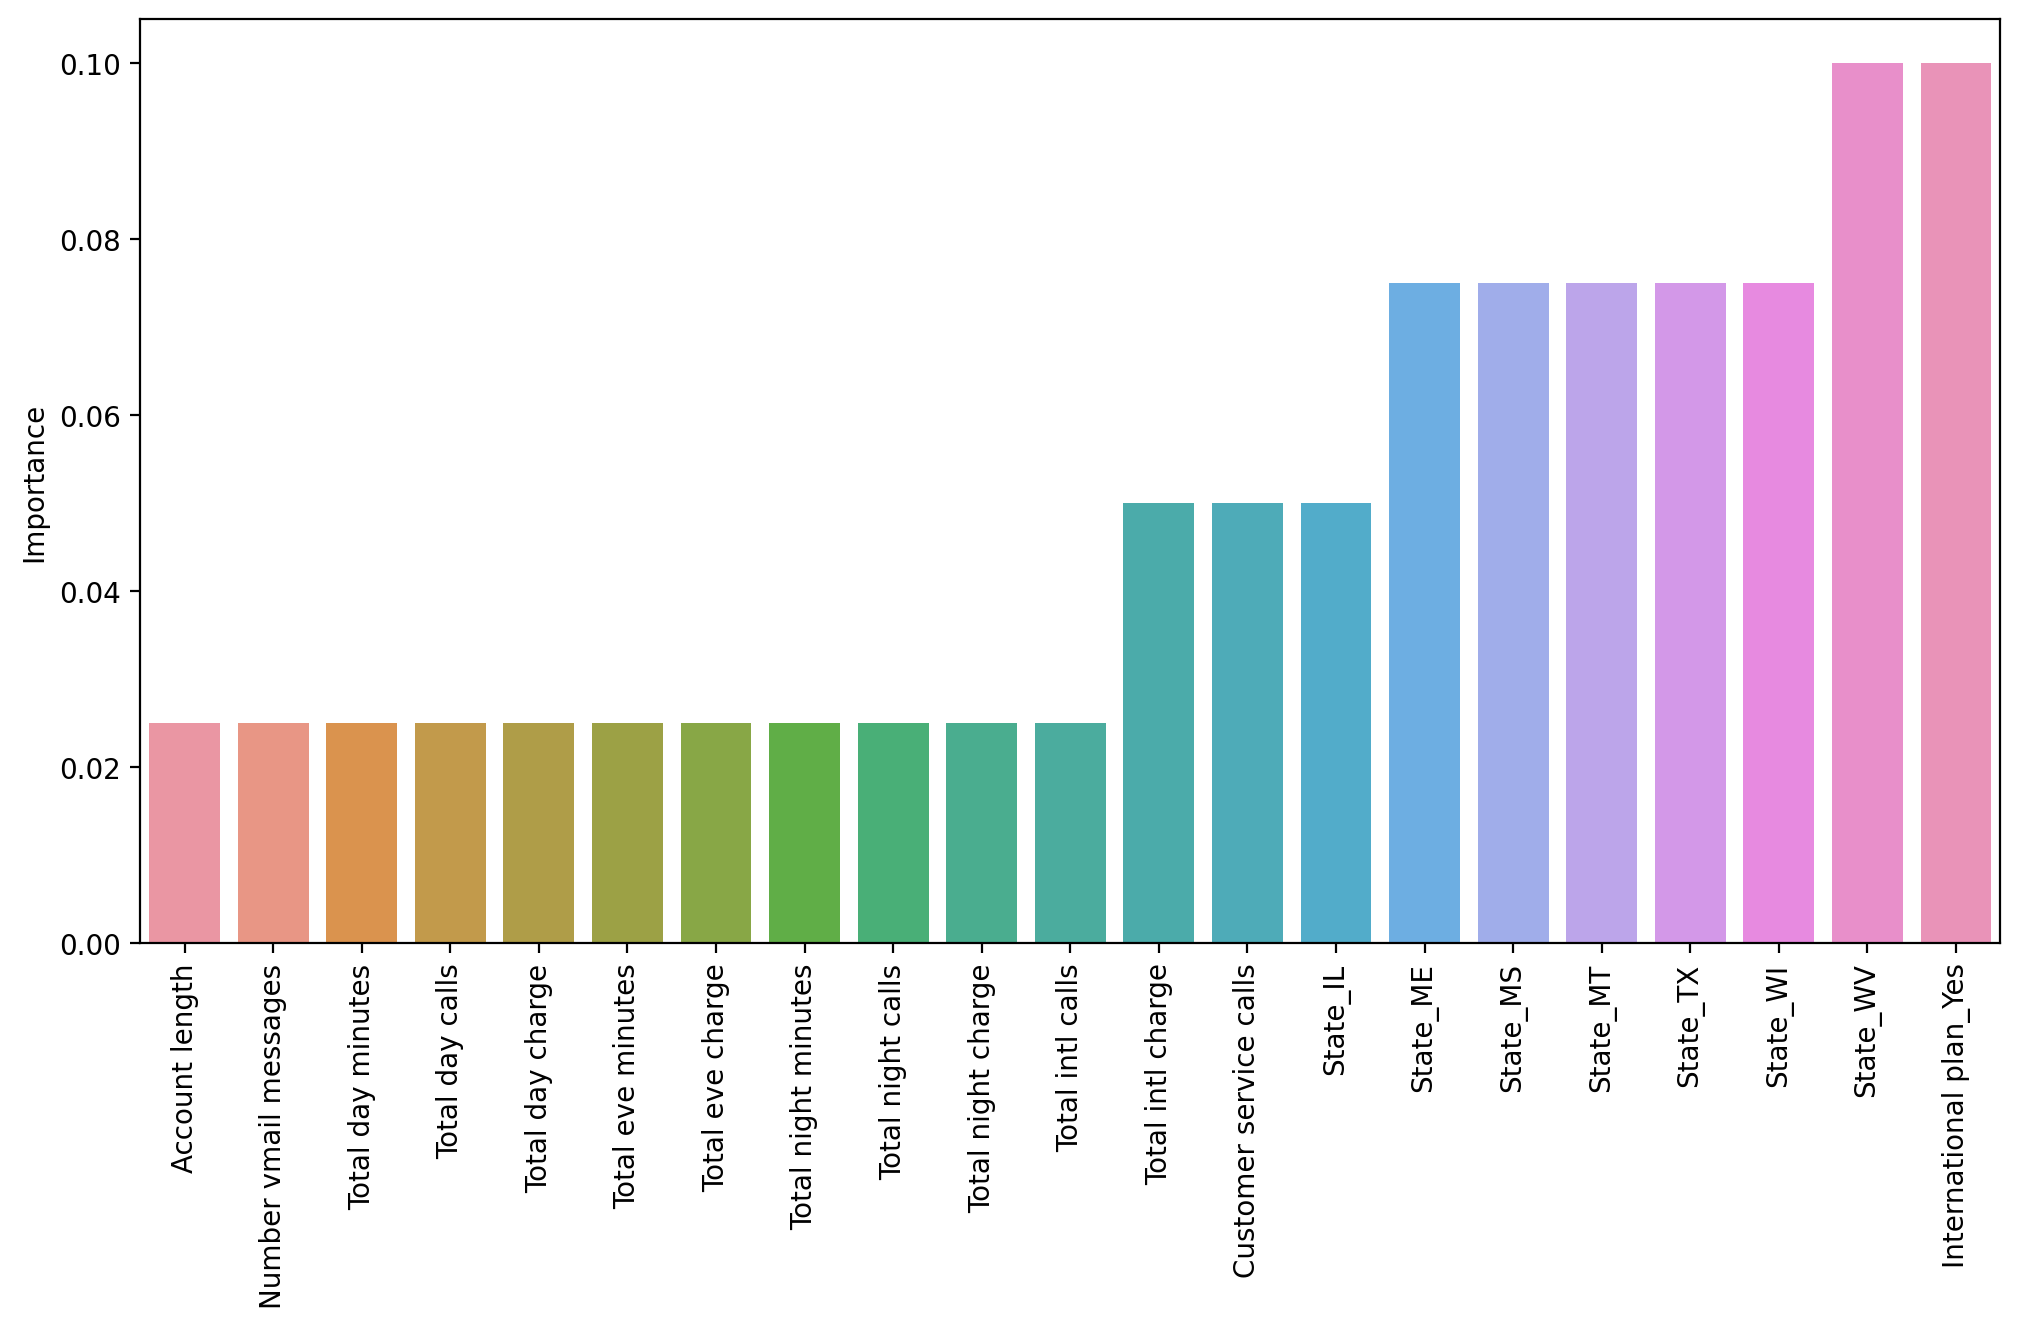

In [111]:
plt.figure(figsize=(12, 6), dpi=200)

sns.barplot(data=important_features_ab.sort_values("Importance"),
            x=important_features_ab.index,  # Fix the typo here
            y='Importance')

plt.xticks(rotation=90)
plt.show()


In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have your data loaded as x and y, and you have split it into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Assuming you have trained an AdaBoost model (grid_ab is the GridSearchCV object as mentioned before)
# grid_ab = GridSearchCV(estimator_ab, param_grid_ab, cv=5, scoring='accuracy')
# grid_ab.fit(x_train, y_train)

# Get the best model from GridSearchCV
best_ab_model = grid_ab.best_estimator_

# Make predictions on the test set
ypred_test_ab = best_ab_model.predict(x_test)

# Now you can calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, ypred_test_ab)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[421  20]
 [ 71  22]]


In [113]:

best_ab_model = grid_ab.best_estimator_

# Make predictions on the test set
ypred_test_ab = best_ab_model.predict(x_test)

# Now you can calculate the classification report
class_report = classification_report(y_test, ypred_test_ab)

# Print the classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       441
           1       0.52      0.24      0.33        93

    accuracy                           0.83       534
   macro avg       0.69      0.60      0.61       534
weighted avg       0.80      0.83      0.80       534



In [114]:
pip install xgboost